In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV, ElasticNetCV, LinearRegression
from sklearn.feature_selection import mutual_info_regression, RFE
from sklearn.inspection import PartialDependenceDisplay
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.stats import zscore
from matplotlib_venn import venn3
from upsetplot import from_memberships, UpSet
from sklearn.model_selection import cross_val_score
import xgboost as xgb
import itertools
from sklearn.metrics import mean_squared_error, r2_score

,outer_fold,n_features,model,mean_inner_r2,best_inner_params,selected_features,best_inner_model
0,0,50,LinearRegression,0.217525,"{'copy_X': True, 'fit_intercept': True, 'n_job...","['spleen_shape_Elongation', 'scapula_right_ngt...",LinearRegression()
1,0,50,Ridge,0.322660,"{'alpha': 0.001025874037478159, 'copy_X': True...","['spleen_shape_Elongation', 'scapula_right_ngt...","Ridge(alpha=0.001025874037478159, random_state..."
2,0,50,Lasso,0.324185,"{'alpha': 0.001025874037478159, 'copy_X': True...","['spleen_shape_Elongation', 'scapula_right_ngt...","Lasso(alpha=0.001025874037478159, random_state..."
3,0,50,ElasticNet,0.324270,"{'alpha': 0.0010213715247508574, 'copy_X': Tru...","['spleen_shape_Elongation', 'scapula_right_ngt...","ElasticNet(alpha=0.0010213715247508574, l1_rat..."
4,0,50,RandomForest,0.568065,"{'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...","['spleen_shape_Elongation', 'scapula_right_ngt...","RandomForestRegressor(max_depth=14, max_featur..."


Models with only NaN results (excluded from analysis): {'GPT2ICL'}


n_features,50
model,
DecisionTree,0.261382
ElasticNet,0.324270
HistGradientBoostingRegressor,0.584349
KNN,0.240470
Lasso,0.324185
LightGBM,0.588763
LinearRegression,0.295990
MLP,0.314356
RandomForest,0.568065


,model,n_features,mean_inner_r2,best_inner_params
0,DecisionTree,50,0.261382,"{'ccp_alpha': 0.0, 'criterion': 'squared_error..."
1,ElasticNet,50,0.324270,"{'alpha': 0.0010213715247508574, 'copy_X': Tru..."
2,HistGradientBoostingRegressor,50,0.584349,"{'categorical_features': 'warn', 'early_stoppi..."
3,KNN,50,0.240470,"{'algorithm': 'auto', 'leaf_size': 30, 'metric..."
4,Lasso,50,0.324185,"{'alpha': 0.001025874037478159, 'copy_X': True..."
5,LightGBM,50,0.588763,"{'boosting_type': 'gbdt', 'class_weight': None..."
6,LinearRegression,50,0.295990,"{'copy_X': True, 'fit_intercept': True, 'n_job..."
7,MLP,50,0.314356,"{'activation': 'relu', 'alpha': 0.000362020605..."
8,RandomForest,50,0.568065,"{'bootstrap': True, 'ccp_alpha': 0.0, 'criteri..."
9,Ridge,50,0.322660,"{'alpha': 0.001025874037478159, 'copy_X': True..."


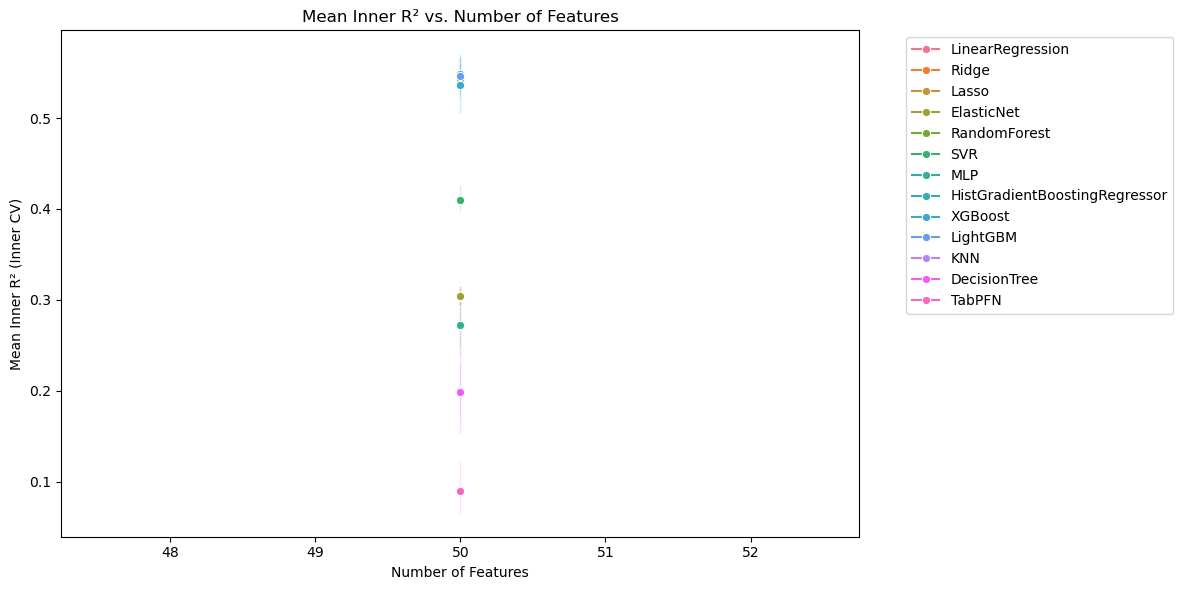

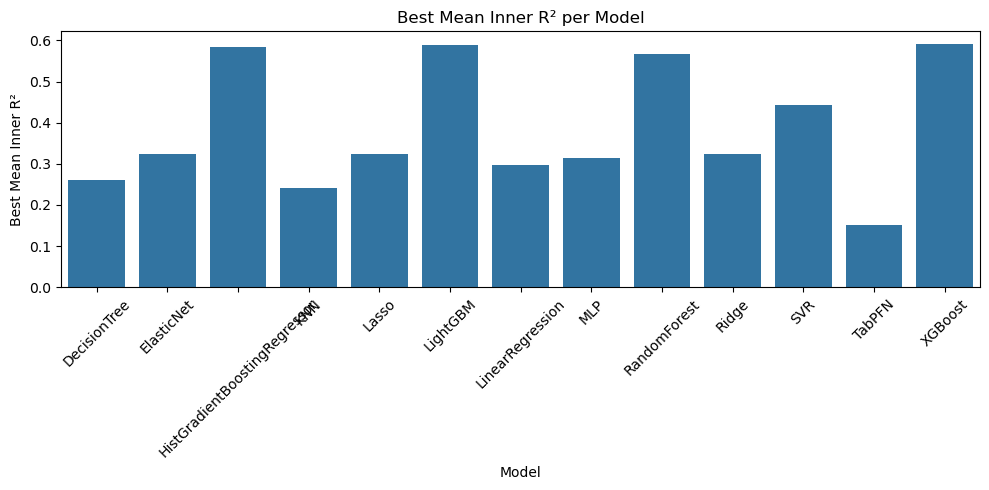

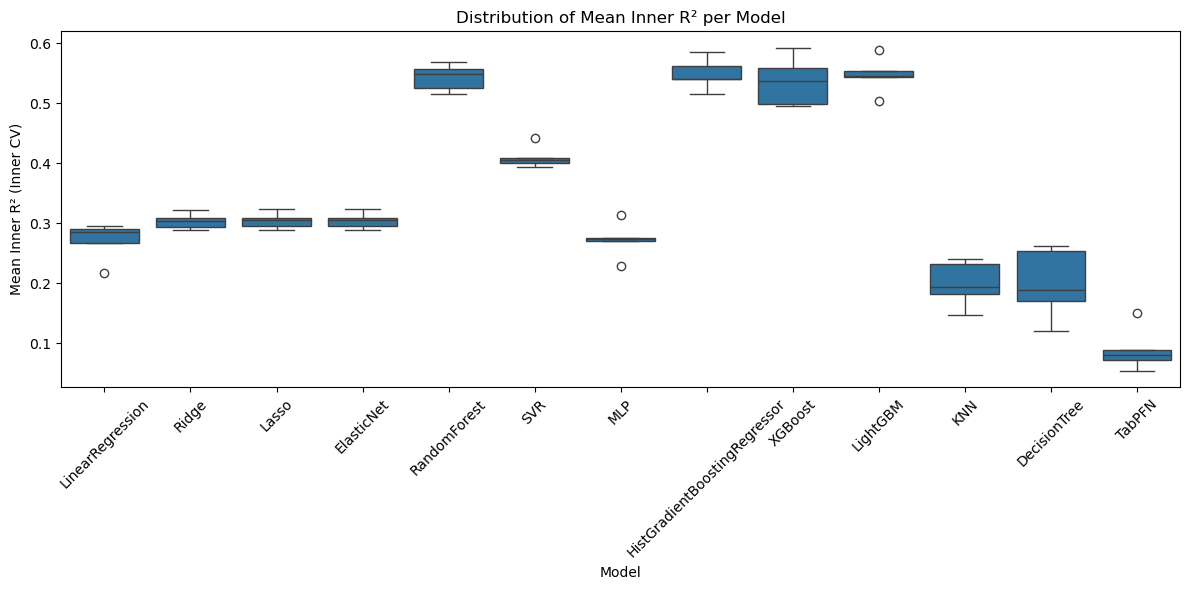

Number of times each model was best (per fold & n_features):
model
RandomForest                     2
XGBoost                          1
LightGBM                         1
HistGradientBoostingRegressor    1
Name: count, dtype: int64


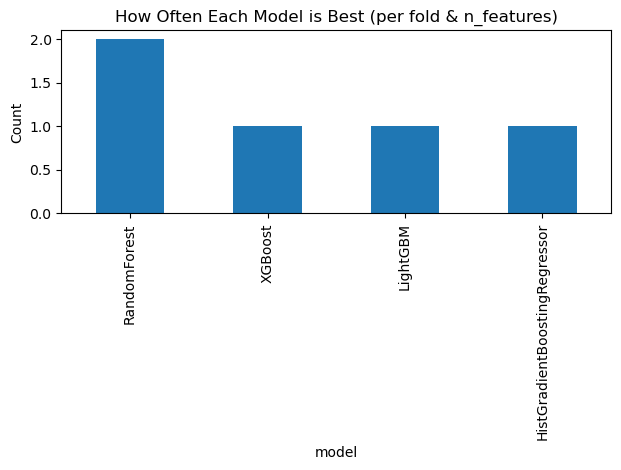

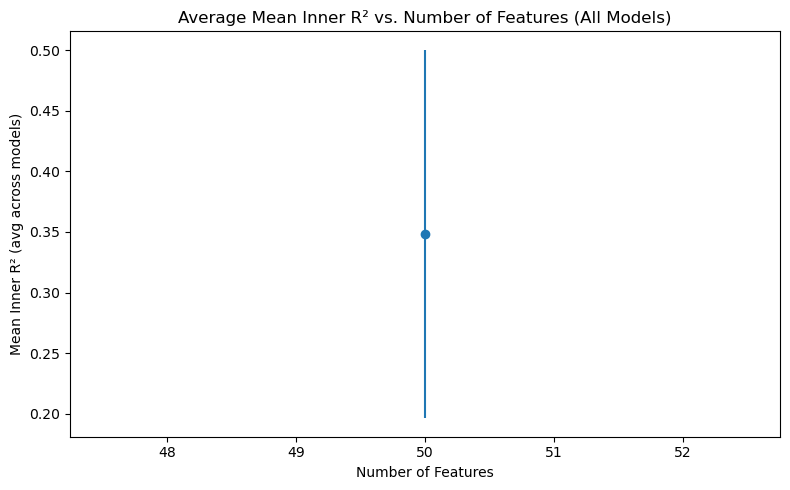

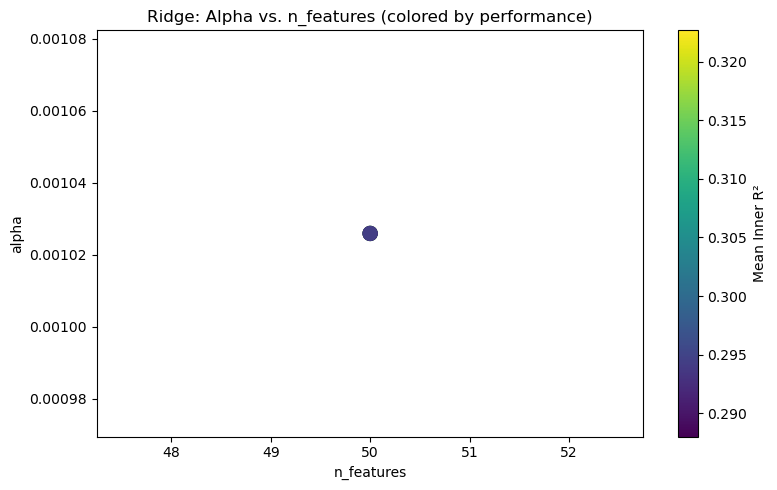

Top 20 most frequently selected features:
spleen_shape_Elongation: 5
scapula_right_ngtdm_Busyness: 5
scapula_right_glszm_LargeAreaEmphasis: 5
scapula_right_glszm_LargeAreaHighGrayLevelEmphasis: 5
scapula_right_glszm_LargeAreaLowGrayLevelEmphasis: 5
scapula_right_glszm_SizeZoneNonUniformity: 5
scapula_right_glszm_SizeZoneNonUniformityNormalized: 5
scapula_right_glszm_SmallAreaHighGrayLevelEmphasis: 5
scapula_right_glszm_SmallAreaLowGrayLevelEmphasis: 5
scapula_right_glszm_ZoneEntropy: 5
scapula_right_glszm_ZonePercentage: 5
clavicula_left_shape_Elongation: 5
scapula_right_glszm_GrayLevelNonUniformityNormalized: 5
clavicula_left_shape_LeastAxisLength: 5
clavicula_left_shape_Maximum2DDiameterColumn: 5
clavicula_left_shape_Maximum2DDiameterRow: 5
clavicula_left_shape_Maximum2DDiameterSlice: 5
clavicula_left_shape_MinorAxisLength: 5
clavicula_left_firstorder_10Percentile: 5
clavicula_left_firstorder_90Percentile: 5


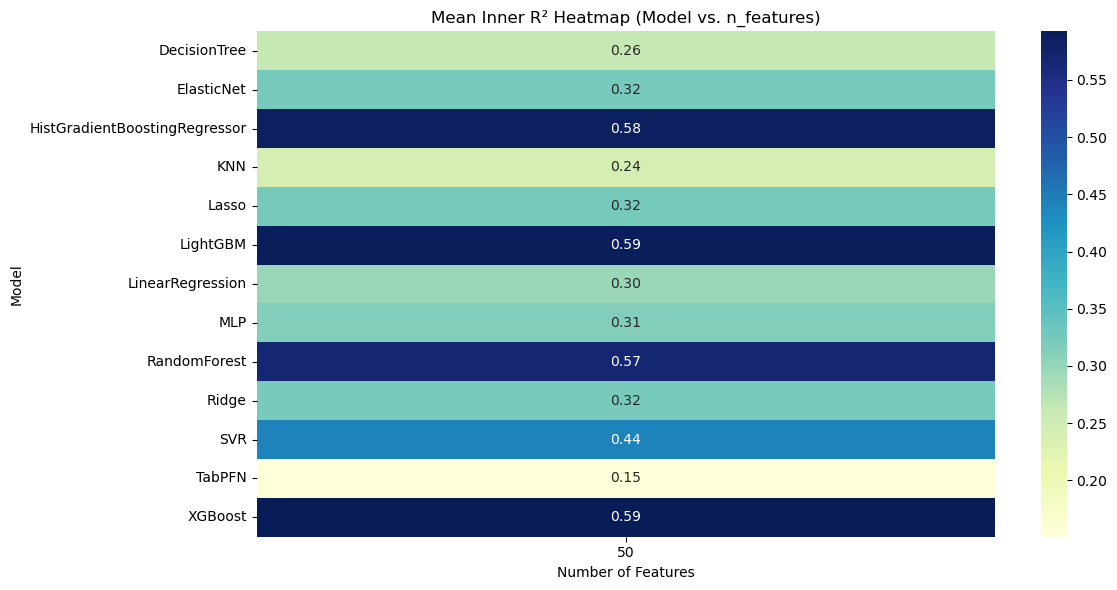

Standard deviation of mean_inner_r2 across folds for each model:
model
DecisionTree                     0.059301
XGBoost                          0.040989
KNN                              0.038159
TabPFN                           0.036692
LinearRegression                 0.032075
MLP                              0.030539
LightGBM                         0.030266
HistGradientBoostingRegressor    0.025789
RandomForest                     0.021708
SVR                              0.018889
ElasticNet                       0.013587
Lasso                            0.013578
Ridge                            0.013382
Name: mean_inner_r2, dtype: float64


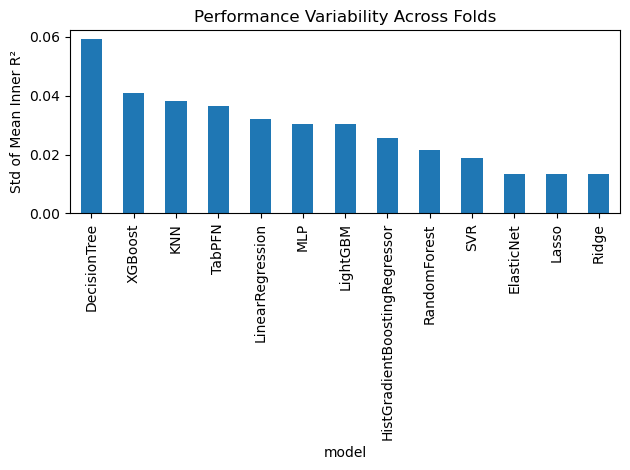

Correlation between n_features and mean_inner_r2 for each model:
LinearRegression: correlation = nan
Ridge: correlation = nan
Lasso: correlation = nan
ElasticNet: correlation = nan
RandomForest: correlation = nan
SVR: correlation = nan
MLP: correlation = nan
HistGradientBoostingRegressor: correlation = nan
XGBoost: correlation = nan
LightGBM: correlation = nan
KNN: correlation = nan
DecisionTree: correlation = nan
TabPFN: correlation = nan
Best model per (outer_fold, n_features):


/meta/projects/practical_sose25/.conda/envs/adlm-icl/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/meta/projects/practical_sose25/.conda/envs/adlm-icl/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


,outer_fold,n_features,model,mean_inner_r2,best_inner_params,selected_features,best_inner_model
8,0,50,XGBoost,0.592502,"{'objective': 'reg:squarederror', 'base_score'...","['spleen_shape_Elongation', 'scapula_right_ngt...","XGBRegressor(base_score=None, booster=None, ca..."
23,1,50,LightGBM,0.544653,"{'boosting_type': 'gbdt', 'class_weight': None...","['spleen_shape_Elongation', 'clavicula_left_gl...",LGBMRegressor(colsample_bytree=0.8668982441914...
32,2,50,RandomForest,0.548065,"{'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...","['spleen_shape_Elongation', 'clavicula_left_gl...","RandomForestRegressor(max_depth=14, max_featur..."
49,3,50,HistGradientBoostingRegressor,0.561130,"{'categorical_features': 'warn', 'early_stoppi...","['spleen_shape_Elongation', 'clavicula_left_gl...",HistGradientBoostingRegressor(learning_rate=0....
60,4,50,RandomForest,0.525678,"{'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...","['spleen_shape_Elongation', 'clavicula_left_fi...","RandomForestRegressor(max_depth=14, max_featur..."


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from collections import Counter

# Load the results
df = pd.read_csv('/vol/miltank/projects/practical_sose25/in_context_learning/regression/results/run_20250709_183735/nested_cv/nested_cv_inner_results.csv')
display(df.head())

# Drop rows with NaN mean_inner_r2 for all further analysis
df_valid = df.dropna(subset=['mean_inner_r2'])

# Identify models with only NaN results
all_models = set(df['model'].unique())
valid_models = set(df_valid['model'].unique())
only_nan_models = all_models - valid_models
if only_nan_models:
    print("Models with only NaN results (excluded from analysis):", only_nan_models)

# 1. Summary Table: Best Mean Inner R² per Model and n_features
summary = df_valid.pivot_table(
    index='model',
    columns='n_features',
    values='mean_inner_r2',
    aggfunc='max'
)
summary.to_csv('summary_table_by_model_and_n_features.csv')
display(summary)

# 2. Best Configuration per Model
if not df_valid.empty:
    best_per_model = (
        df_valid.loc[df_valid.groupby('model')['mean_inner_r2'].idxmax()]
        .reset_index(drop=True)
    )
    display(best_per_model[['model', 'n_features', 'mean_inner_r2', 'best_inner_params']])
else:
    print("No valid (non-NaN) results for any model.")

# 3. Line Plot: Mean Inner R² vs. Number of Features for Each Model
if not df_valid.empty:
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_valid, x='n_features', y='mean_inner_r2', hue='model', marker='o')
    plt.title('Mean Inner R² vs. Number of Features')
    plt.ylabel('Mean Inner R² (Inner CV)')
    plt.xlabel('Number of Features')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# 4. Bar Plot: Best Mean Inner R² per Model
if not df_valid.empty:
    plt.figure(figsize=(10, 5))
    sns.barplot(data=best_per_model, x='model', y='mean_inner_r2')
    plt.title('Best Mean Inner R² per Model')
    plt.ylabel('Best Mean Inner R²')
    plt.xlabel('Model')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 5. Boxplot: Distribution of Mean Inner R² per Model
if not df_valid.empty:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df_valid, x='model', y='mean_inner_r2')
    plt.title('Distribution of Mean Inner R² per Model')
    plt.ylabel('Mean Inner R² (Inner CV)')
    plt.xlabel('Model')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 6. How Often is Each Model the Best?
if not df_valid.empty:
    best_per_fold_feat = df_valid.loc[df_valid.groupby(['outer_fold', 'n_features'])['mean_inner_r2'].idxmax()]
    model_counts = best_per_fold_feat['model'].value_counts()
    print("Number of times each model was best (per fold & n_features):")
    print(model_counts)
    model_counts.plot(kind='bar', title='How Often Each Model is Best (per fold & n_features)')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

# 7. Effect of n_features Across All Models
if not df_valid.empty:
    mean_by_nfeat = df_valid.groupby('n_features')['mean_inner_r2'].mean()
    std_by_nfeat = df_valid.groupby('n_features')['mean_inner_r2'].std()
    plt.figure(figsize=(8,5))
    plt.errorbar(mean_by_nfeat.index, mean_by_nfeat.values, yerr=std_by_nfeat.values, fmt='-o')
    plt.title('Average Mean Inner R² vs. Number of Features (All Models)')
    plt.xlabel('Number of Features')
    plt.ylabel('Mean Inner R² (avg across models)')
    plt.tight_layout()
    plt.show()

# 8. Hyperparameter Exploration (example: Ridge alpha)
if 'Ridge' in valid_models:
    ridge = df_valid[df_valid['model'] == 'Ridge'].copy()
    ridge['alpha'] = ridge['best_inner_params'].apply(lambda x: ast.literal_eval(x).get('alpha') if pd.notnull(x) else None)
    plt.figure(figsize=(8,5))
    plt.scatter(ridge['n_features'], ridge['alpha'], c=ridge['mean_inner_r2'], cmap='viridis', s=100)
    plt.colorbar(label='Mean Inner R²')
    plt.title('Ridge: Alpha vs. n_features (colored by performance)')
    plt.xlabel('n_features')
    plt.ylabel('alpha')
    plt.tight_layout()
    plt.show()

# 9. Feature Selection Frequency
if not df_valid.empty:
    best_configs = df_valid.loc[df_valid.groupby(['outer_fold', 'n_features'])['mean_inner_r2'].idxmax()]
    all_feats = []
    for feats in best_configs['selected_features']:
        if pd.notnull(feats):
            try:
                all_feats.extend(ast.literal_eval(feats))
            except Exception:
                pass
    feat_counts = Counter(all_feats)
    top_feats = feat_counts.most_common(20)
    print("Top 20 most frequently selected features:")
    for feat, count in top_feats:
        print(f"{feat}: {count}")

# 10. Performance Heatmap (Model vs. n_features)
if not summary.empty:
    plt.figure(figsize=(12, 6))
    sns.heatmap(summary, annot=True, fmt=".2f", cmap="YlGnBu")
    plt.title("Mean Inner R² Heatmap (Model vs. n_features)")
    plt.ylabel("Model")
    plt.xlabel("Number of Features")
    plt.tight_layout()
    plt.show()

# 11. Performance Consistency Across Folds
if not df_valid.empty:
    model_fold_std = df_valid.groupby('model')['mean_inner_r2'].std().sort_values(ascending=False)
    print("Standard deviation of mean_inner_r2 across folds for each model:")
    print(model_fold_std)
    model_fold_std.plot(kind='bar', title='Performance Variability Across Folds')
    plt.ylabel('Std of Mean Inner R²')
    plt.tight_layout()
    plt.show()

# 12. Correlation Between n_features and Performance for Each Model
if not df_valid.empty:
    print("Correlation between n_features and mean_inner_r2 for each model:")
    for model in df_valid['model'].unique():
        sub = df_valid[df_valid['model'] == model]
        corr = sub['n_features'].corr(sub['mean_inner_r2'])
        print(f"{model}: correlation = {corr:.2f}")

# 13. Show All Configs Where a Model Outperformed All Others
if not df_valid.empty:
    print("Best model per (outer_fold, n_features):")
    display(best_per_fold_feat)

# 14. Save All Best Configs to CSV
if not df_valid.empty:
    best_per_fold_feat.to_csv('best_model_per_fold_and_n_features.csv', index=False)

In [6]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Path to your results file
csv_path = "/vol/miltank/projects/practical_sose25/in_context_learning/regression/results/run_20250709_183735/nested_cv/nested_cv_inner_results.csv"  # Change this if needed

# Output directory for tables and plots
output_dir = os.path.join(os.path.dirname(csv_path), "regression_analysis")
os.makedirs(output_dir, exist_ok=True)

# Load results
df = pd.read_csv(csv_path)
print(f"Loaded {len(df)} rows from {csv_path}")

# Detect main metric (robust for inner/outer results)
possible_metrics = [
    "mean_inner_r2", "mean_inner_f1", "r2", "f1_weighted", "accuracy", "mae", "rmse", "mse", "explained_variance"
]
main_metric = next((m for m in possible_metrics if m in df.columns), None)
if not main_metric:
    raise ValueError(f"Could not find a main metric column in {df.columns}")

print(f"Main metric detected: {main_metric}")

# Drop rows with NaN in main metric
df_clean = df.dropna(subset=[main_metric])
if df_clean.empty:
    raise ValueError(f"All rows have NaN for {main_metric}. Check your results file.")

# Warn about models with only NaN results
models_with_nan = set(df['model']) - set(df_clean['model'])
if models_with_nan:
    print(f"Warning: The following models have only NaN {main_metric} and will be excluded: {models_with_nan}")

# Summary table: mean, std, min, max, count per model
summary = df_clean.groupby("model")[main_metric].agg(['mean', 'std', 'min', 'max', 'count']).sort_values("mean", ascending=False)
summary.to_csv(os.path.join(output_dir, "summary_table.csv"))
print("Saved summary table.")

# Best config per model (across all folds)
idx = df_clean.groupby("model")[main_metric].idxmax()
best_configs = df_clean.loc[idx].sort_values(main_metric, ascending=False)
best_configs.to_csv(os.path.join(output_dir, "best_config_per_model.csv"), index=False)
print("Saved best config per model.")

# Best config per fold
fold_col = "outer_fold" if "outer_fold" in df_clean.columns else ("fold" if "fold" in df_clean.columns else None)
if fold_col:
    idx_fold = df_clean.groupby([fold_col])[main_metric].idxmax()
    best_per_fold = df_clean.loc[idx_fold].sort_values(fold_col)
    best_per_fold.to_csv(os.path.join(output_dir, "best_config_per_fold.csv"), index=False)
    print("Saved best config per fold.")

# Boxplot of main metric per model
plt.figure(figsize=(10, 6))
sns.boxplot(x="model", y=main_metric, data=df_clean)
plt.title(f"{main_metric.upper()} Distribution per Model")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, f"boxplot_{main_metric}_per_model.png"))
plt.close()
print("Saved boxplot.")

# Barplot of mean metric per model
plt.figure(figsize=(10, 6))
sns.barplot(x=summary.index, y=summary['mean'])
plt.title(f"Mean {main_metric.upper()} per Model")
plt.ylabel(f"Mean {main_metric.upper()}")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, f"barplot_mean_{main_metric}_per_model.png"))
plt.close()
print("Saved barplot.")

# Lineplot: metric vs n_features (if available)
if "n_features" in df_clean.columns:
    plt.figure(figsize=(10, 6))
    sns.lineplot(x="n_features", y=main_metric, hue="model", data=df_clean, marker="o")
    plt.title(f"{main_metric.upper()} vs Number of Features")
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f"lineplot_{main_metric}_vs_n_features.png"))
    plt.close()
    print("Saved lineplot (metric vs n_features).")

# Per-fold plot (if fold column exists)
if fold_col:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=fold_col, y=main_metric, data=df_clean)
    plt.title(f"{main_metric.upper()} per Fold (All Models)")
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f"boxplot_{main_metric}_per_fold.png"))
    plt.close()
    print("Saved per-fold boxplot.")

# Save cleaned results for further analysis
df_clean.to_csv(os.path.join(output_dir, "cleaned_results.csv"), index=False)
print("Saved cleaned results.")

print(f"All tables and plots saved in {output_dir}")

Loaded 70 rows from /vol/miltank/projects/practical_sose25/in_context_learning/regression/results/run_20250709_183735/nested_cv/nested_cv_inner_results.csv
Main metric detected: mean_inner_r2
Saved summary table.
Saved best config per model.
Saved best config per fold.
Saved boxplot.
Saved barplot.
Saved lineplot (metric vs n_features).
Saved per-fold boxplot.
Saved cleaned results.
All tables and plots saved in /vol/miltank/projects/practical_sose25/in_context_learning/regression/results/run_20250709_183735/nested_cv/regression_analysis


In [7]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Path to your results file
csv_path = "/vol/miltank/projects/practical_sose25/in_context_learning/regression/results/run_20250709_183735/nested_cv/nested_cv_inner_results.csv"  

# Output directory for tables and plots
output_dir = os.path.join(os.path.dirname(csv_path), "regression_analysis")
os.makedirs(output_dir, exist_ok=True)

# Load results
df = pd.read_csv(csv_path)
print(f"Loaded {len(df)} rows from {csv_path}")

# Detect main metric (robust for inner/outer results)
possible_metrics = [
    "mean_inner_r2", "mean_inner_f1", "r2", "f1_weighted", "accuracy", "mae", "rmse", "mse", "explained_variance"
]
main_metric = next((m for m in possible_metrics if m in df.columns), None)
if not main_metric:
    raise ValueError(f"Could not find a main metric column in {df.columns}")

print(f"Main metric detected: {main_metric}")

# Drop rows with NaN in main metric
df_clean = df.dropna(subset=[main_metric])
if df_clean.empty:
    raise ValueError(f"All rows have NaN for {main_metric}. Check your results file.")

# Warn about models with only NaN results
models_with_nan = set(df['model']) - set(df_clean['model'])
if models_with_nan:
    print(f"Warning: The following models have only NaN {main_metric} and will be excluded: {models_with_nan}")

# Summary table: mean, std, min, max, count per model
summary = df_clean.groupby("model")[main_metric].agg(['mean', 'std', 'min', 'max', 'count']).sort_values("mean", ascending=False)
summary.to_csv(os.path.join(output_dir, "summary_table.csv"))
print("Saved summary table.")

# Best config per model (across all folds)
idx = df_clean.groupby("model")[main_metric].idxmax()
best_configs = df_clean.loc[idx].sort_values(main_metric, ascending=False)
best_configs.to_csv(os.path.join(output_dir, "best_config_per_model.csv"), index=False)
print("Saved best config per model.")

# Best config per fold
fold_col = "outer_fold" if "outer_fold" in df_clean.columns else ("fold" if "fold" in df_clean.columns else None)
if fold_col:
    idx_fold = df_clean.groupby([fold_col])[main_metric].idxmax()
    best_per_fold = df_clean.loc[idx_fold].sort_values(fold_col)
    best_per_fold.to_csv(os.path.join(output_dir, "best_config_per_fold.csv"), index=False)
    print("Saved best config per fold.")

# Boxplot of main metric per model
plt.figure(figsize=(10, 6))
sns.boxplot(x="model", y=main_metric, data=df_clean)
plt.title(f"{main_metric.upper()} Distribution per Model")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, f"boxplot_{main_metric}_per_model.png"))
plt.close()
print("Saved boxplot.")

# Barplot of mean metric per model
plt.figure(figsize=(10, 6))
sns.barplot(x=summary.index, y=summary['mean'])
plt.title(f"Mean {main_metric.upper()} per Model")
plt.ylabel(f"Mean {main_metric.upper()}")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, f"barplot_mean_{main_metric}_per_model.png"))
plt.close()
print("Saved barplot.")

# Lineplot: metric vs n_features (if available)
if "n_features" in df_clean.columns:
    plt.figure(figsize=(10, 6))
    sns.lineplot(x="n_features", y=main_metric, hue="model", data=df_clean, marker="o")
    plt.title(f"{main_metric.upper()} vs Number of Features")
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f"lineplot_{main_metric}_vs_n_features.png"))
    plt.close()
    print("Saved lineplot (metric vs n_features).")

# Per-fold plot (if fold column exists)
if fold_col:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=fold_col, y=main_metric, data=df_clean)
    plt.title(f"{main_metric.upper()} per Fold (All Models)")
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f"boxplot_{main_metric}_per_fold.png"))
    plt.close()
    print("Saved per-fold boxplot.")

# Save cleaned results for further analysis
df_clean.to_csv(os.path.join(output_dir, "cleaned_results.csv"), index=False)
print("Saved cleaned results.")

print(f"All tables and plots saved in {output_dir}")

Loaded 70 rows from /vol/miltank/projects/practical_sose25/in_context_learning/regression/results/run_20250709_183735/nested_cv/nested_cv_inner_results.csv
Main metric detected: mean_inner_r2
Saved summary table.
Saved best config per model.
Saved best config per fold.
Saved boxplot.
Saved barplot.
Saved lineplot (metric vs n_features).
Saved per-fold boxplot.
Saved cleaned results.
All tables and plots saved in /vol/miltank/projects/practical_sose25/in_context_learning/regression/results/run_20250709_183735/nested_cv/regression_analysis


In [8]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Path to your results file
csv_path = "/vol/miltank/projects/practical_sose25/in_context_learning/regression/results/run_20250709_183735/nested_cv/nested_cv_inner_results.csv"  

# Output directory for tables and plots
output_dir = os.path.join(os.path.dirname(csv_path), "regression_analysis")
os.makedirs(output_dir, exist_ok=True)

# Load results
df = pd.read_csv(csv_path)
print(f"Loaded {len(df)} rows from {csv_path}")

# Detect main metric (robust for inner/outer results)
possible_metrics = [
    "mean_inner_r2", "mean_inner_f1", "r2", "f1_weighted", "accuracy", "mae", "rmse", "mse", "explained_variance"
]
main_metric = next((m for m in possible_metrics if m in df.columns), None)
if not main_metric:
    raise ValueError(f"Could not find a main metric column in {df.columns}")

print(f"Main metric detected: {main_metric}")

# Drop rows with NaN in main metric
df_clean = df.dropna(subset=[main_metric])
if df_clean.empty:
    raise ValueError(f"All rows have NaN for {main_metric}. Check your results file.")

# Warn about models with only NaN results
models_with_nan = set(df['model']) - set(df_clean['model'])
if models_with_nan:
    print(f"Warning: The following models have only NaN {main_metric} and will be excluded: {models_with_nan}")

# Summary table: mean, std, min, max, count per model
summary = df_clean.groupby("model")[main_metric].agg(['mean', 'std', 'min', 'max', 'count']).sort_values("mean", ascending=False)
summary.to_csv(os.path.join(output_dir, "summary_table.csv"))
print("Saved summary table.")

# Best config per model (across all folds)
idx = df_clean.groupby("model")[main_metric].idxmax()
best_configs = df_clean.loc[idx].sort_values(main_metric, ascending=False)
best_configs.to_csv(os.path.join(output_dir, "best_config_per_model.csv"), index=False)
print("Saved best config per model.")

# Best config per fold
fold_col = "outer_fold" if "outer_fold" in df_clean.columns else ("fold" if "fold" in df_clean.columns else None)
if fold_col:
    idx_fold = df_clean.groupby([fold_col])[main_metric].idxmax()
    best_per_fold = df_clean.loc[idx_fold].sort_values(fold_col)
    best_per_fold.to_csv(os.path.join(output_dir, "best_config_per_fold.csv"), index=False)
    print("Saved best config per fold.")

# Boxplot of main metric per model
plt.figure(figsize=(10, 6))
sns.boxplot(x="model", y=main_metric, data=df_clean)
plt.title(f"{main_metric.upper()} Distribution per Model")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, f"boxplot_{main_metric}_per_model.png"))
plt.close()
print("Saved boxplot.")

# Barplot of mean metric per model
plt.figure(figsize=(10, 6))
sns.barplot(x=summary.index, y=summary['mean'])
plt.title(f"Mean {main_metric.upper()} per Model")
plt.ylabel(f"Mean {main_metric.upper()}")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, f"barplot_mean_{main_metric}_per_model.png"))
plt.close()
print("Saved barplot.")

# Lineplot: metric vs n_features (if available)
if "n_features" in df_clean.columns:
    plt.figure(figsize=(10, 6))
    sns.lineplot(x="n_features", y=main_metric, hue="model", data=df_clean, marker="o")
    plt.title(f"{main_metric.upper()} vs Number of Features")
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f"lineplot_{main_metric}_vs_n_features.png"))
    plt.close()
    print("Saved lineplot (metric vs n_features).")

# Per-fold plot (if fold column exists)
if fold_col:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=fold_col, y=main_metric, data=df_clean)
    plt.title(f"{main_metric.upper()} per Fold (All Models)")
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f"boxplot_{main_metric}_per_fold.png"))
    plt.close()
    print("Saved per-fold boxplot.")

# Save cleaned results for further analysis
df_clean.to_csv(os.path.join(output_dir, "cleaned_results.csv"), index=False)
print("Saved cleaned results.")

print(f"All tables and plots saved in {output_dir}")

Loaded 70 rows from /vol/miltank/projects/practical_sose25/in_context_learning/regression/results/run_20250709_183735/nested_cv/nested_cv_inner_results.csv
Main metric detected: mean_inner_r2
Saved summary table.
Saved best config per model.
Saved best config per fold.
Saved boxplot.
Saved barplot.
Saved lineplot (metric vs n_features).
Saved per-fold boxplot.
Saved cleaned results.
All tables and plots saved in /vol/miltank/projects/practical_sose25/in_context_learning/regression/results/run_20250709_183735/nested_cv/regression_analysis


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Path to your results file
csv_path = "/vol/miltank/projects/practical_sose25/in_context_learning/regression/results/run_20250709_183735/nested_cv/nested_cv_inner_results.csv"  

# Output directory for tables and plots
output_dir = os.path.join(os.path.dirname(csv_path), "regression_analysis")
os.makedirs(output_dir, exist_ok=True)

# Load results
df = pd.read_csv(csv_path)
print(f"Loaded {len(df)} rows from {csv_path}")

# Detect main metric
possible_metrics = [
    "mean_inner_r2", "mean_inner_f1", "r2", "f1_weighted", "accuracy", "mae", "rmse", "mse", "explained_variance"]
main_metric = next((m for m in possible_metrics if m in df.columns), None)
if not main_metric:
    raise ValueError(f"Could not find a main metric column in {df.columns}")

print(f"Main metric detected: {main_metric}")

# Drop rows with NaN in main metric
df_clean = df.dropna(subset=[main_metric])
if df_clean.empty:
    raise ValueError(f"All rows have NaN for {main_metric}. Check your results file.")

# Warn about models with only NaN results
models_with_nan = set(df['model']) - set(df_clean['model'])
if models_with_nan:
    print(f"Warning: The following models have only NaN {main_metric} and will be excluded: {models_with_nan}")

# Summary table: mean, std, min, max, count per model
summary = df_clean.groupby("model")[main_metric].agg(['mean', 'std', 'min', 'max', 'count']).sort_values("mean", ascending=False)
summary.to_csv(os.path.join(output_dir, "summary_table.csv"))
print("Saved summary table.")

# Best config per model (across all folds)
idx = df_clean.groupby("model")[main_metric].idxmax()
best_configs = df_clean.loc[idx].sort_values(main_metric, ascending=False)
best_configs.to_csv(os.path.join(output_dir, "best_config_per_model.csv"), index=False)
print("Saved best config per model.")

# Best config per fold
if "fold" in df_clean.columns:
    idx_fold = df_clean.groupby(["fold"])["r2"].idxmax()
    best_per_fold = df_clean.loc[idx_fold].sort_values("fold")
    best_per_fold.to_csv(os.path.join(output_dir, "best_config_per_fold.csv"), index=False)
    print("Saved best config per fold.")

# Boxplot of main metric per model
plt.figure(figsize=(10, 6))
sns.boxplot(x="model", y=main_metric, data=df_clean)
plt.title(f"{main_metric.upper()} Distribution per Model")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, f"boxplot_{main_metric}_per_model.png"))
plt.close()
print("Saved boxplot.")

# Barplot of mean metric per model
plt.figure(figsize=(10, 6))
sns.barplot(x=summary.index, y=summary['mean'])
plt.title(f"Mean {main_metric.upper()} per Model")
plt.ylabel(f"Mean {main_metric.upper()}")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, f"barplot_mean_{main_metric}_per_model.png"))
plt.close()
print("Saved barplot.")

# Lineplot: metric vs n_features (if available)
if "n_features" in df_clean.columns:
    plt.figure(figsize=(10, 6))
    sns.lineplot(x="n_features", y=main_metric, hue="model", data=df_clean, marker="o")
    plt.title(f"{main_metric.upper()} vs Number of Features")
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f"lineplot_{main_metric}_vs_n_features.png"))
    plt.close()
    print("Saved lineplot (metric vs n_features).")

# Per-fold plot (if fold column exists)
if "fold" in df_clean.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x="fold", y=main_metric, data=df_clean)
    plt.title(f"{main_metric.upper()} per Fold (All Models)")
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f"boxplot_{main_metric}_per_fold.png"))
    plt.close()
    print("Saved per-fold boxplot.")

# Save cleaned results for further analysis
df_clean.to_csv(os.path.join(output_dir, "cleaned_results.csv"), index=False)
print("Saved cleaned results.")

print(f"All tables and plots saved in {output_dir}")

Loaded 70 rows from /vol/miltank/projects/practical_sose25/in_context_learning/regression/results/run_20250709_183735/nested_cv/nested_cv_inner_results.csv


ValueError: Could not find a main metric column in Index(['outer_fold', 'n_features', 'model', 'mean_inner_r2',
       'best_inner_params', 'selected_features', 'best_inner_model'],
      dtype='object')

In [15]:
data = pd.read_csv("../data/healthy_train.csv")
data = data.dropna()
X = data.drop(columns=["age"])
y = data["age"]
feature_cols = X.columns

In [16]:
z_scores = np.abs(zscore(X))
outliers = (z_scores > 4).any(axis=1)
X = X[~outliers]
y = y[~outliers]

In [17]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

In [18]:
corr_matrix = X_scaled_df.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [col for col in upper_tri.columns if any(upper_tri[col] > 0.95)]
X_pruned = X_scaled_df.drop(columns=to_drop)
print(f"Dropped {len(to_drop)} highly correlated features.")

Dropped 1 highly correlated features.


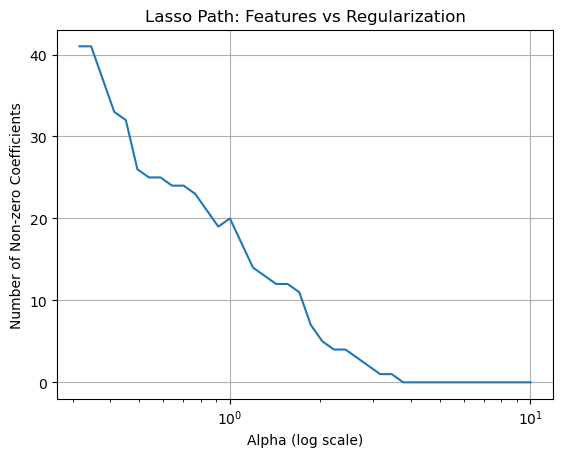

In [19]:
alphas = np.logspace(-0.5, 1, 40)
lasso = LassoCV(alphas=alphas, cv=3, max_iter=100000, tol=1e-3, n_jobs=-1, random_state=42)
lasso.fit(X_scaled, y)
lasso_coef = pd.Series(lasso.coef_, index=X.columns)
selected_lasso = lasso_coef[lasso_coef != 0].index.tolist()

plt.plot(lasso.alphas_, np.count_nonzero(lasso.path(X_scaled, y, alphas=alphas, max_iter=100000)[1], axis=0))
plt.xscale('log')
plt.xlabel("Alpha (log scale)")
plt.ylabel("Number of Non-zero Coefficients")
plt.title("Lasso Path: Features vs Regularization")
plt.grid(True)
plt.show()

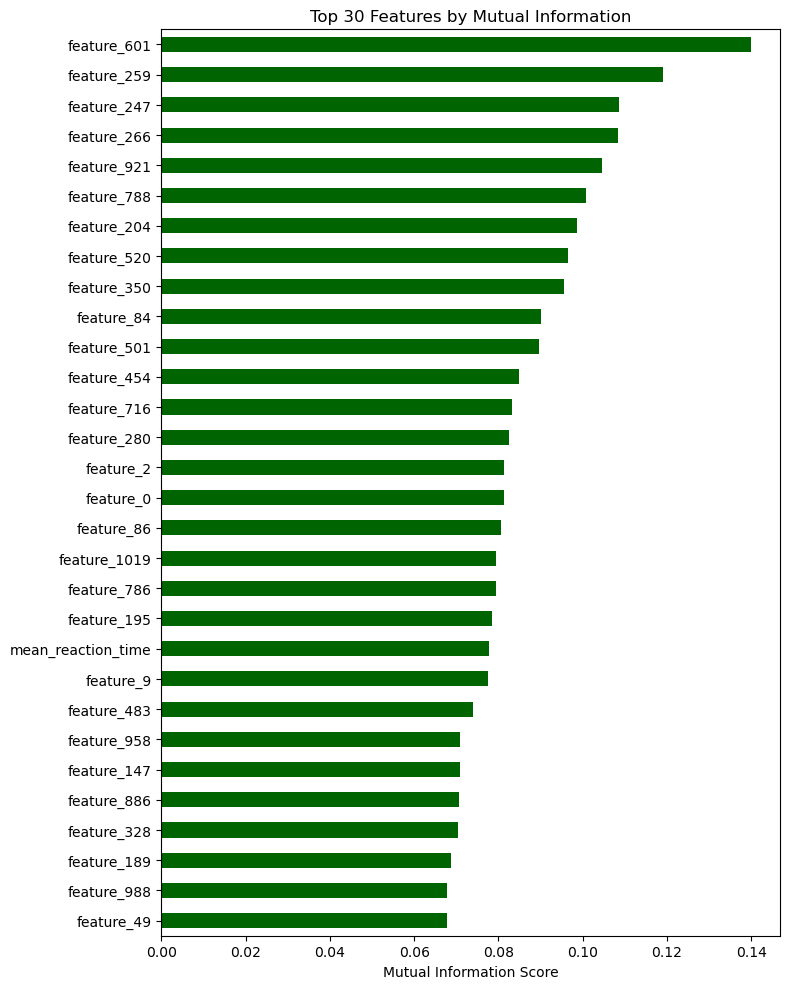

In [20]:
mi = mutual_info_regression(X_scaled, y, random_state=42)
mi_scores = pd.Series(mi, index=X.columns).sort_values(ascending=False)
selected_mi = mi_scores.head(200).index.tolist()

mi_scores.head(30).sort_values().plot(kind='barh', figsize=(8, 10), color='darkgreen')
plt.xlabel("Mutual Information Score")
plt.title("Top 30 Features by Mutual Information")
plt.tight_layout()
plt.show()

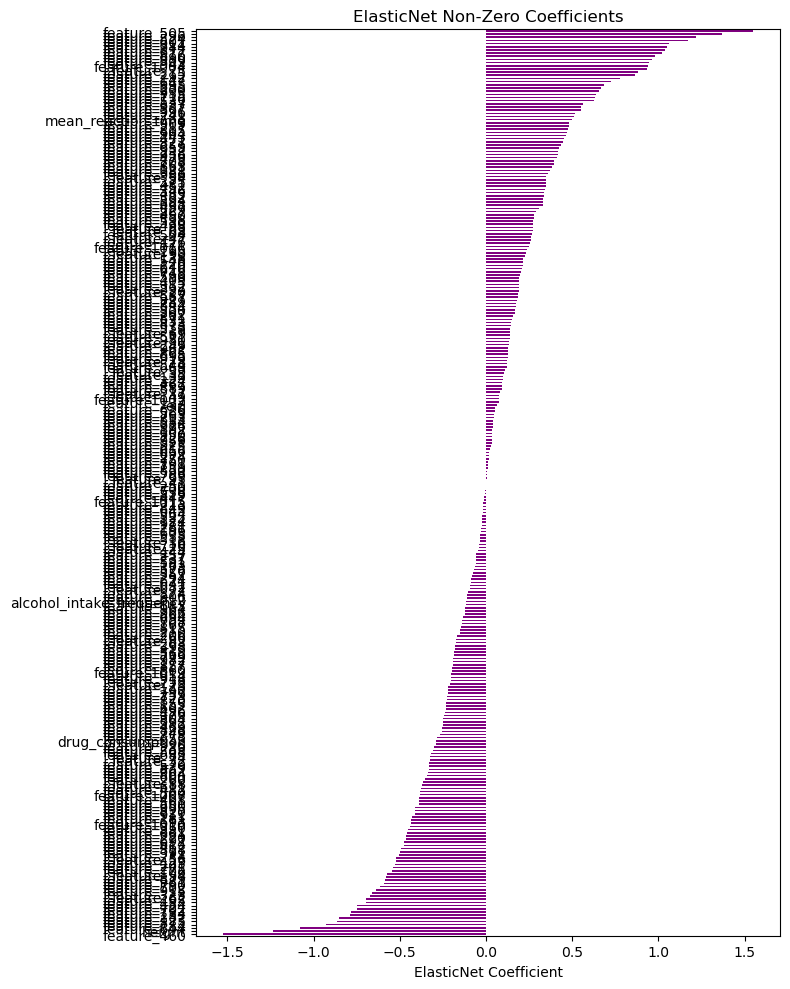

In [21]:
enet = ElasticNetCV(cv=3, max_iter=100000, tol=1e-3, n_alphas=30, l1_ratio=0.9, random_state=42)
enet.fit(X_scaled, y)
enet_coef = pd.Series(enet.coef_, index=X.columns)
selected_enet = enet_coef[enet_coef != 0].index.tolist()

enet_coef[enet_coef != 0].sort_values().plot(kind='barh', figsize=(8, 10), color='purple')
plt.xlabel("ElasticNet Coefficient")
plt.title("ElasticNet Non-Zero Coefficients")
plt.tight_layout()
plt.show()

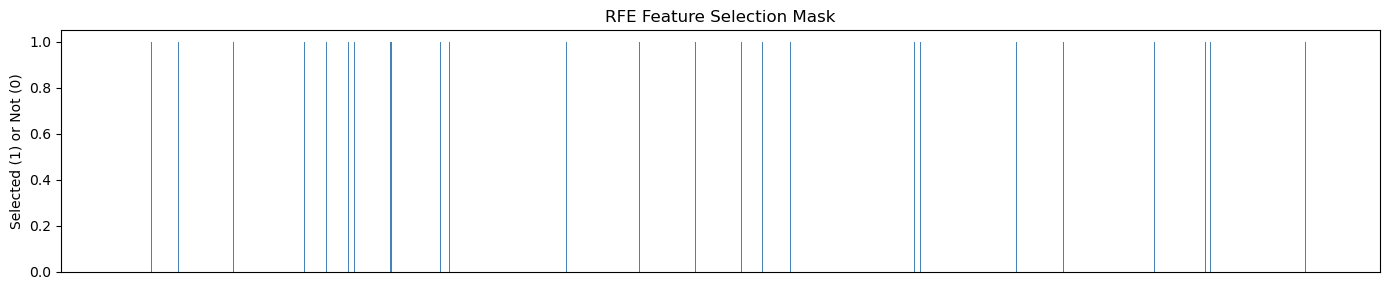

In [22]:
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=40, step=50)
selector.fit(X_scaled, y)
selected_rfe = [f for f, s in zip(X.columns, selector.support_) if s]

rfe_mask = pd.Series(selector.support_, index=X.columns)
rfe_mask.astype(int).plot(kind='bar', figsize=(14, 3), color='steelblue')
plt.ylabel("Selected (1) or Not (0)")
plt.title("RFE Feature Selection Mask")
plt.xticks([], [])
plt.tight_layout()
plt.show()

In [23]:
feature_sets = {
    'LASSO': set(selected_lasso),
    'ElasticNet': set(selected_enet),
    'MI': set(selected_mi),
    'RFE': set(selected_rfe),
}

for name, feats in feature_sets.items():
    print(f"{name} selected {len(feats)} features")

common_features = set.intersection(*feature_sets.values())
print(f"Common features across all methods: {len(common_features)}")

LASSO selected 41 features
ElasticNet selected 286 features
MI selected 200 features
RFE selected 40 features
Common features across all methods: 0


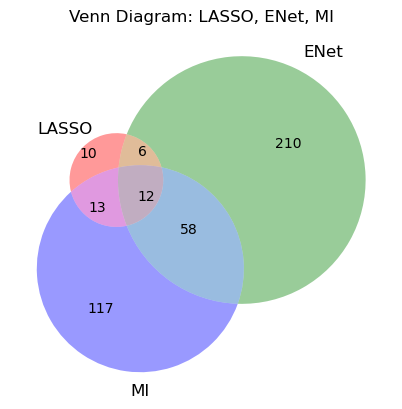

/meta/projects/practical_sose25/.conda/envs/adlm-icl/lib/python3.13/site-packages/upsetplot/data.py:303: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(False, inplace=True)
/meta/projects/practical_sose25/.conda/envs/adlm-icl/lib/python3.13/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on 

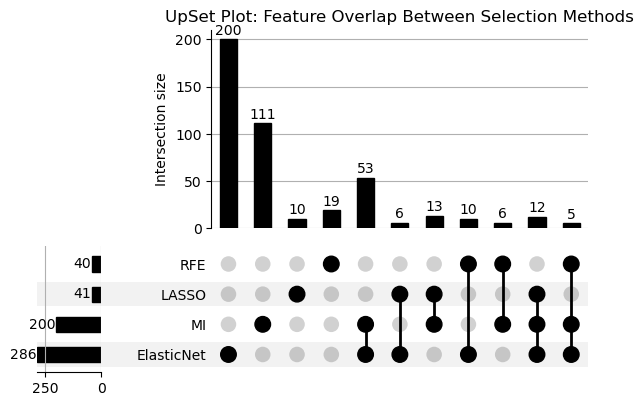

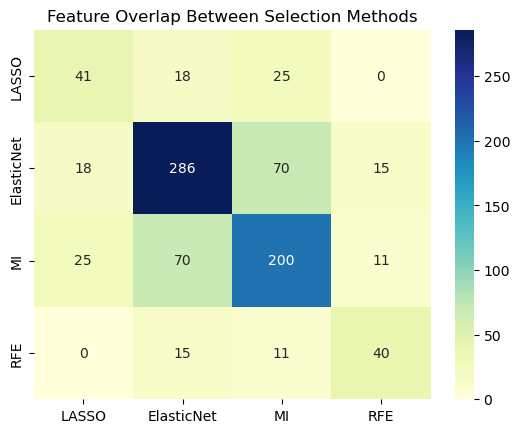

In [27]:
# Venn Diagram
venn3([feature_sets['LASSO'], feature_sets['ElasticNet'], feature_sets['MI']],
      set_labels=('LASSO', 'ENet', 'MI'))
plt.title("Venn Diagram: LASSO, ENet, MI")
plt.show()

# UpSet Plot
all_features = set.union(*feature_sets.values())
memberships = [[method for method in feature_sets if feature in feature_sets[method]] for feature in all_features]
series_raw = from_memberships(memberships, data=[1] * len(memberships))
series_grouped = series_raw.groupby(level=list(range(series_raw.index.nlevels))).sum()
UpSet(series_grouped, show_counts=True).plot()
plt.title("UpSet Plot: Feature Overlap Between Selection Methods")
plt.show()

# Overlap matrix heatmap
overlap_matrix = pd.DataFrame(index=feature_sets.keys(), columns=feature_sets.keys(), dtype=int)
for a, b in itertools.combinations_with_replacement(feature_sets.keys(), 2):
    overlap = len(feature_sets[a] & feature_sets[b])
    overlap_matrix.loc[a, b] = overlap
    overlap_matrix.loc[b, a] = overlap

sns.heatmap(overlap_matrix.astype(int), annot=True, fmt="d", cmap="YlGnBu")
plt.title("Feature Overlap Between Selection Methods")
plt.show()

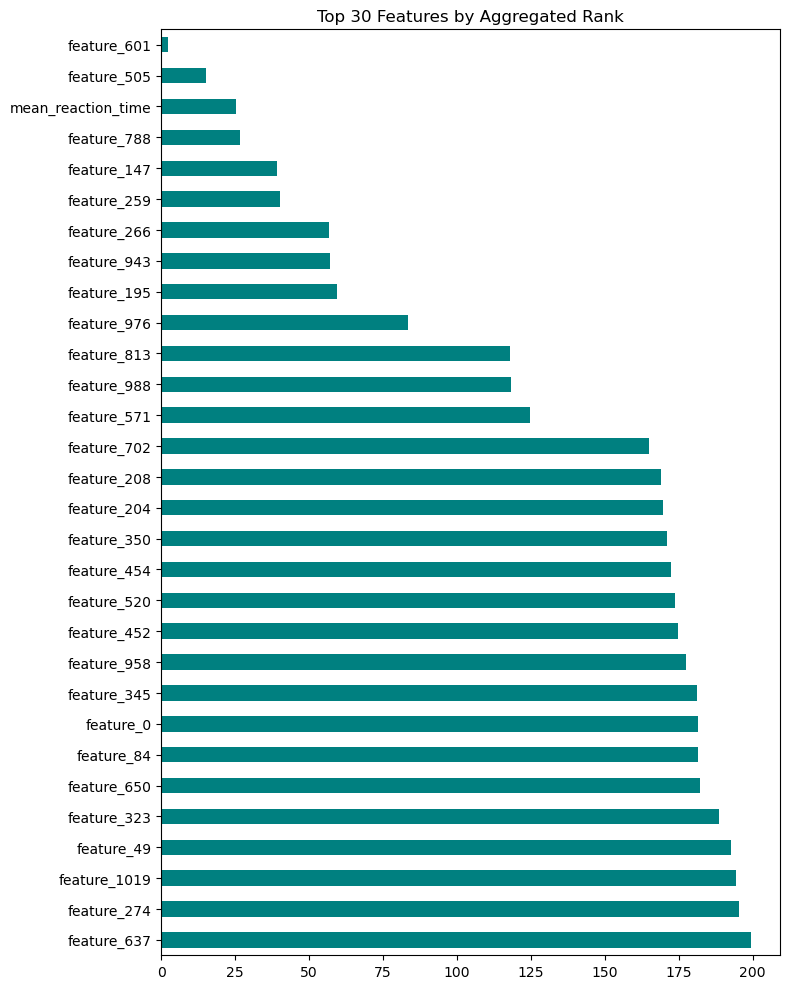

In [28]:
lasso_rank = lasso_coef.abs().rank(ascending=False)
enet_rank = enet_coef.abs().rank(ascending=False)
mi_rank = pd.Series(mi, index=X.columns).rank(ascending=False)
rf = RandomForestRegressor(n_estimators=50, max_depth=15, n_jobs=-1, random_state=42)
rf.fit(X_pruned, y)
rf_importance = pd.Series(rf.feature_importances_, index=X_pruned.columns)
rf_rank = rf_importance.rank(ascending=False)

ranks = pd.concat([lasso_rank, enet_rank, mi_rank, rf_rank], axis=1)
ranks.columns = ['LASSO', 'ElasticNet', 'MI', 'RF']
ranks['MeanRank'] = ranks.mean(axis=1)

top_ranked = ranks.sort_values('MeanRank').head(30)
top_ranked['MeanRank'].plot(kind='barh', figsize=(8, 10), color='teal')
plt.title("Top 30 Features by Aggregated Rank")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

RMSE: 1.96, R²: 0.926


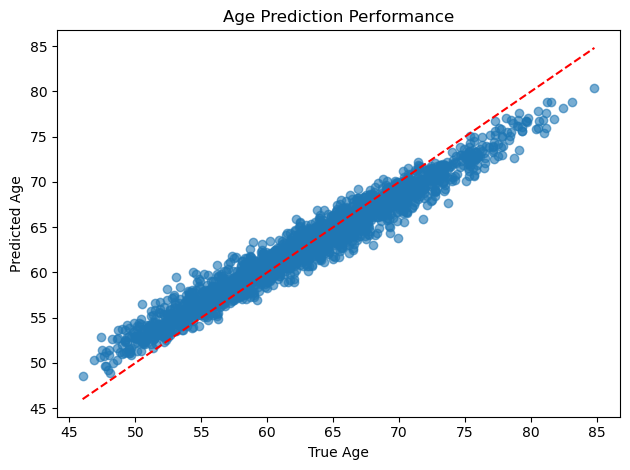

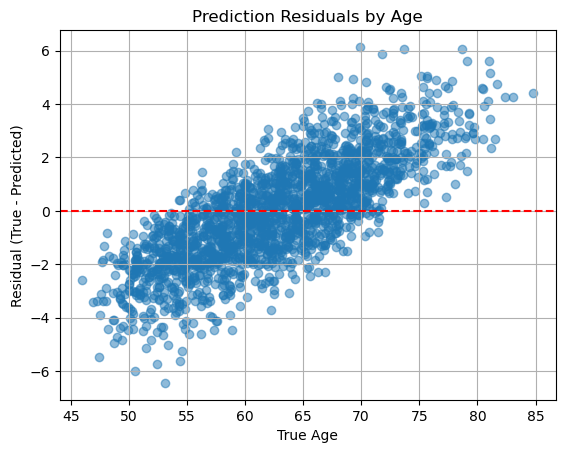

In [30]:
y_pred = rf.predict(X_pruned)
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)
print(f"RMSE: {rmse:.2f}, R²: {r2:.3f}")

plt.scatter(y, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("True Age")
plt.ylabel("Predicted Age")
plt.title("Age Prediction Performance")
plt.tight_layout()
plt.show()

residuals = y - y_pred
plt.scatter(y, residuals, alpha=0.5)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("True Age")
plt.ylabel("Residual (True - Predicted)")
plt.title("Prediction Residuals by Age")
plt.grid(True)
plt.show()


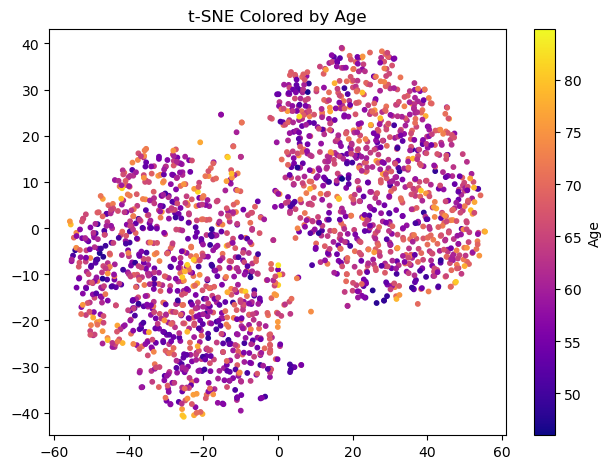

In [31]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_pruned)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='plasma', s=10)
plt.title("t-SNE Colored by Age")
plt.colorbar(label="Age")
plt.tight_layout()
plt.show()

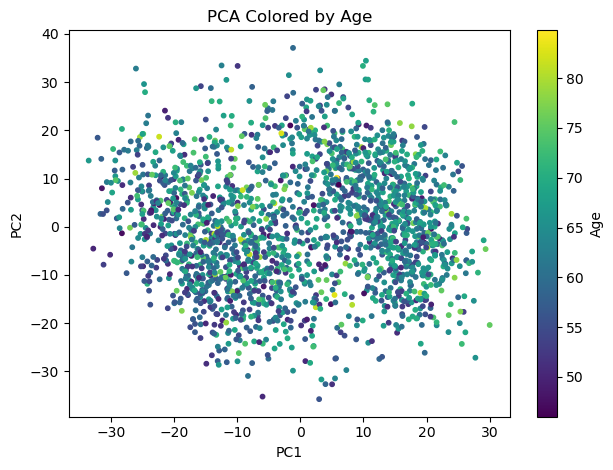

In [32]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_pruned)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=10)
plt.title("PCA Colored by Age")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.colorbar(label="Age")
plt.tight_layout()
plt.show()

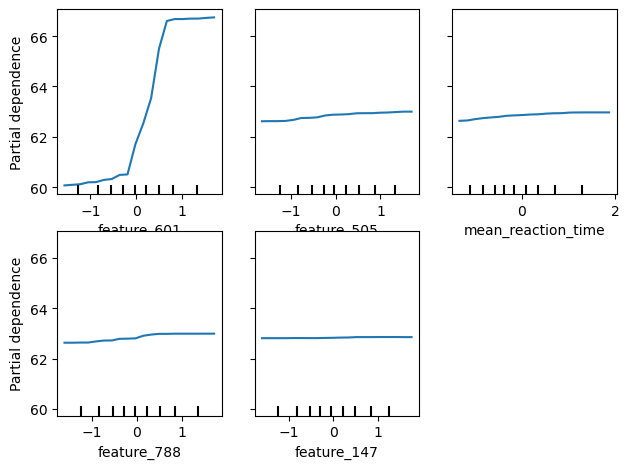

In [36]:
PartialDependenceDisplay.from_estimator(rf, X_pruned, features=top_ranked.index[:5], grid_resolution=20)
plt.tight_layout()
plt.show()

In [42]:
xgb_model = xgb.XGBRegressor(n_estimators=100, max_depth=6, random_state=42)
xgb_model.fit(X_pruned, y)
y_pred_xgb = xgb_model.predict(X_pruned)

rmse_xgb = np.sqrt(mean_squared_error(y, y_pred_xgb))
r2_xgb = r2_score(y, y_pred_xgb)
cv_scores_xgb = cross_val_score(xgb_model, X_pruned, y, cv=5, scoring='r2')

print(f"[XGBoost] RMSE: {rmse_xgb:.2f}, R²: {r2_xgb:.3f}, CV R²: {cv_scores_xgb.mean():.3f} ± {cv_scores_xgb.std():.3f}")

[XGBoost] RMSE: 0.03, R²: 1.000, CV R²: 0.469 ± 0.023


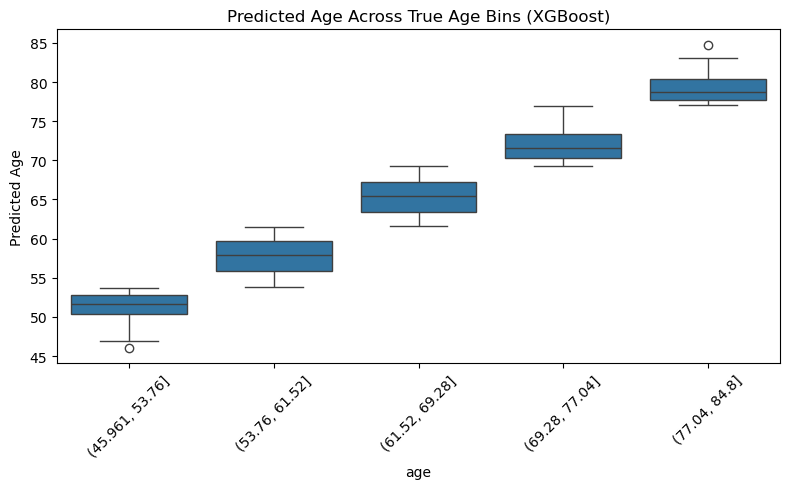

In [43]:
age_bins = pd.cut(y, bins=5)
plt.figure(figsize=(8, 5))
sns.boxplot(x=age_bins, y=y_pred_xgb)
plt.xticks(rotation=45)
plt.title("Predicted Age Across True Age Bins (XGBoost)")
plt.ylabel("Predicted Age")
plt.tight_layout()
plt.show()

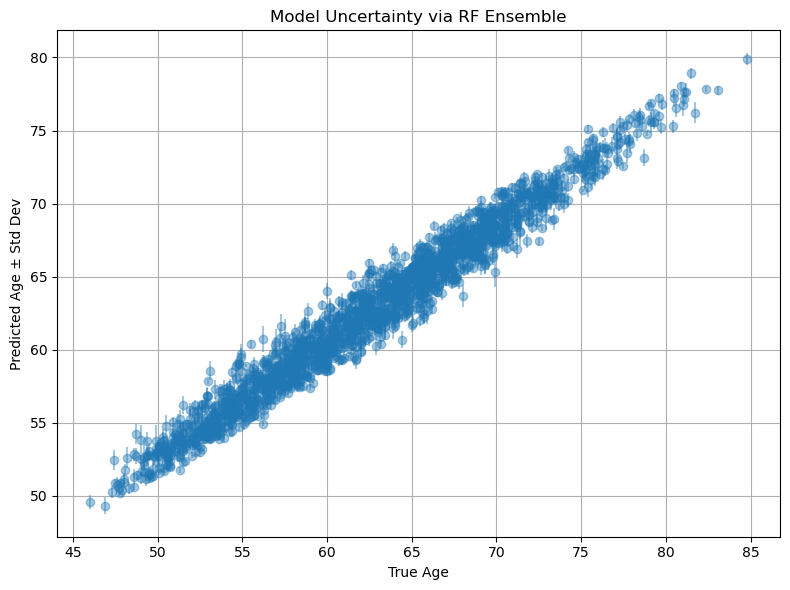

In [44]:
ensemble_preds = []
for seed in range(5):
    rf_model = RandomForestRegressor(n_estimators=100, random_state=seed)
    rf_model.fit(X_pruned, y)
    ensemble_preds.append(rf_model.predict(X_pruned))

ensemble_preds = np.stack(ensemble_preds)
ensemble_mean = ensemble_preds.mean(axis=0)
ensemble_std = ensemble_preds.std(axis=0)

plt.figure(figsize=(8, 6))
plt.errorbar(y, ensemble_mean, yerr=ensemble_std, fmt='o', alpha=0.4)
plt.xlabel("True Age")
plt.ylabel("Predicted Age ± Std Dev")
plt.title("Model Uncertainty via RF Ensemble")
plt.grid(True)
plt.tight_layout()
plt.show()

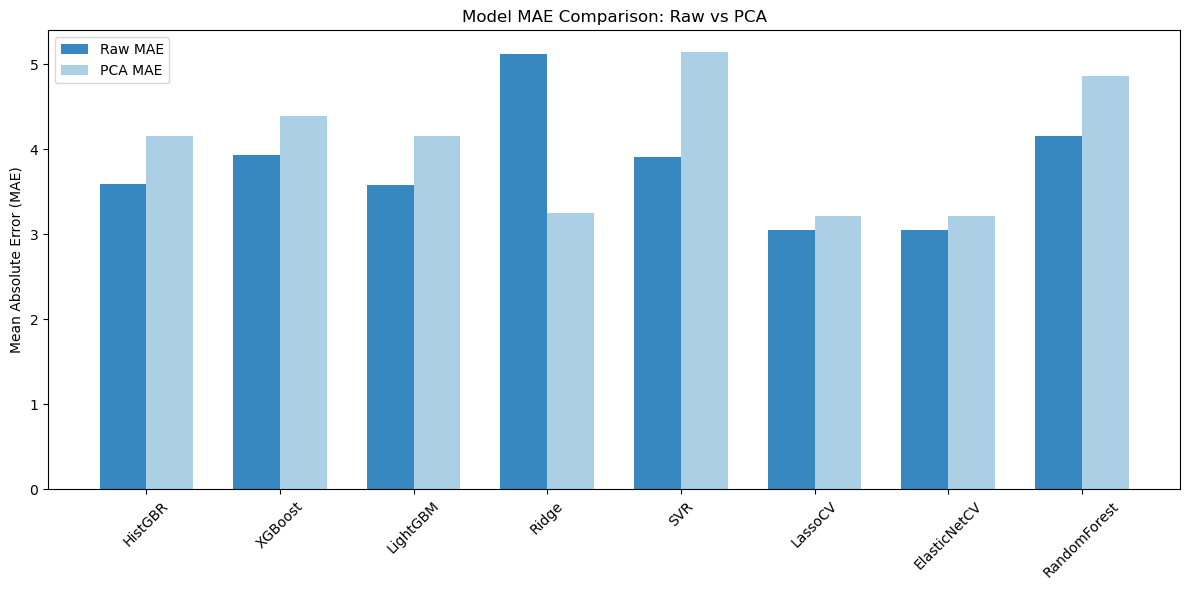

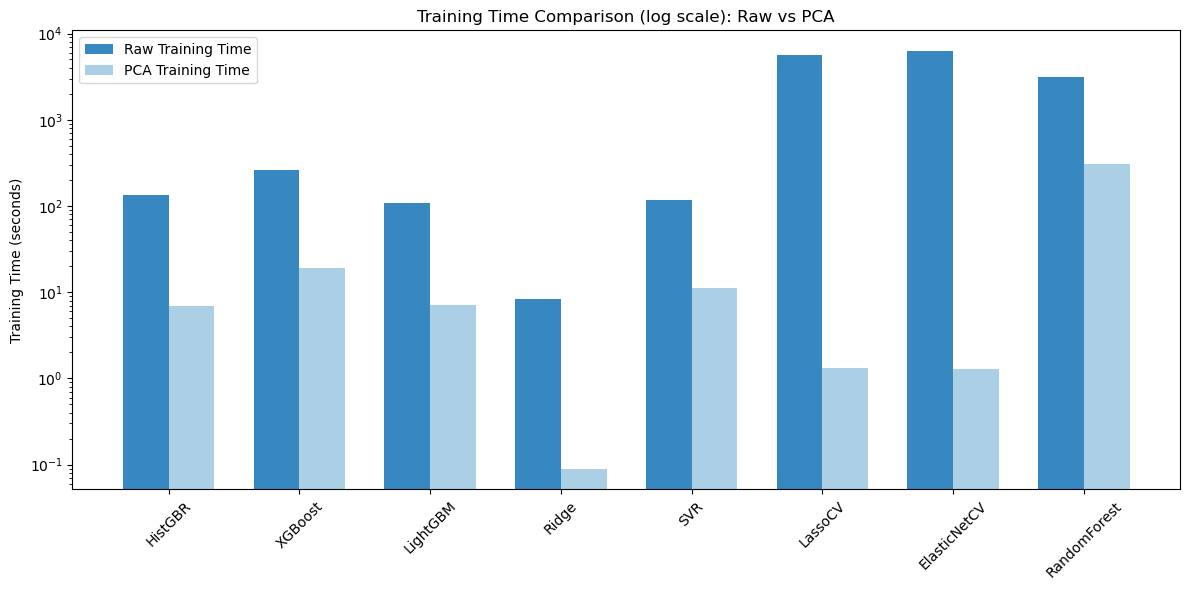

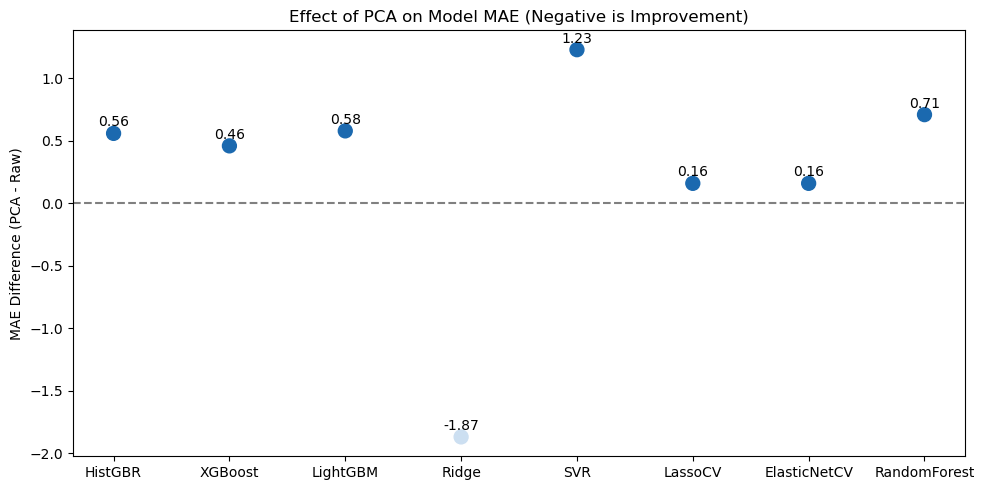

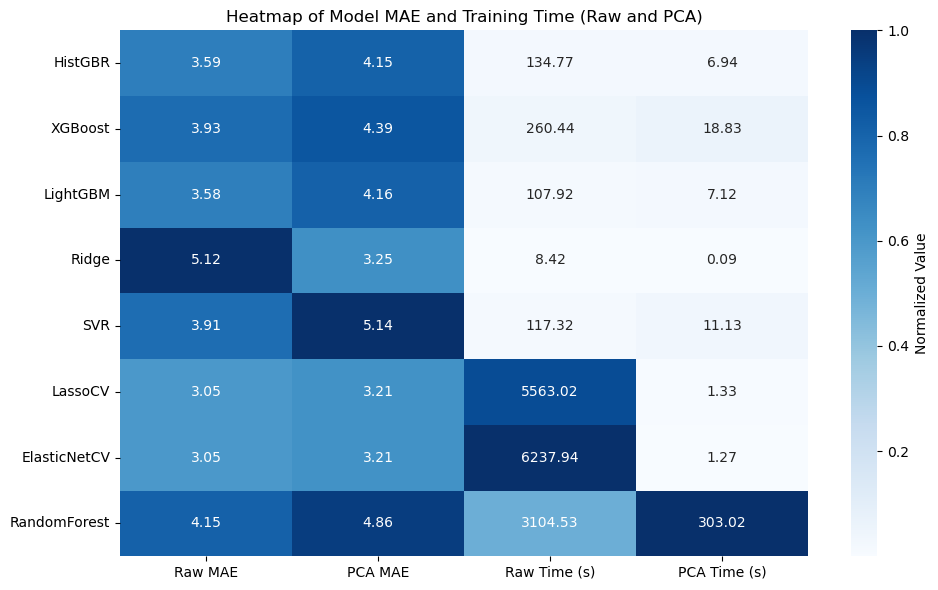

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Your results copied from the output
models = [
    "HistGBR", "XGBoost", "LightGBM", "Ridge",
    "SVR", "LassoCV", "ElasticNetCV", "RandomForest"
]

raw_mae = np.array([3.59, 3.93, 3.58, 5.12, 3.91, 3.05, 3.05, 4.15])
pca_mae = np.array([4.15, 4.39, 4.16, 3.25, 5.14, 3.21, 3.21, 4.86])

raw_time = np.array([134.77, 260.44, 107.92, 8.42, 117.32, 5563.02, 6237.94, 3104.53])
pca_time = np.array([6.94, 18.83, 7.12, 0.09, 11.13, 1.33, 1.27, 303.02])

mae_diff = pca_mae - raw_mae

# Color palette: shades of blue
blue_palette = sns.color_palette("Blues", n_colors=8)

# 1. MAE Comparison Bar Chart
plt.figure(figsize=(12,6))
x = np.arange(len(models))
width = 0.35

plt.bar(x - width/2, raw_mae, width, label='Raw MAE', color=blue_palette[5])
plt.bar(x + width/2, pca_mae, width, label='PCA MAE', color=blue_palette[2])
plt.xticks(x, models, rotation=45)
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Model MAE Comparison: Raw vs PCA')
plt.legend()
plt.tight_layout()
plt.savefig('mae_comparison.png')
plt.show()

# 2. Training Time Comparison Bar Chart (log scale for better visualization)
plt.figure(figsize=(12,6))
plt.bar(x - width/2, raw_time, width, label='Raw Training Time', color=blue_palette[5])
plt.bar(x + width/2, pca_time, width, label='PCA Training Time', color=blue_palette[2])
plt.xticks(x, models, rotation=45)
plt.ylabel('Training Time (seconds)')
plt.yscale('log')
plt.title('Training Time Comparison (log scale): Raw vs PCA')
plt.legend()
plt.tight_layout()
plt.savefig('training_time_comparison.png')
plt.show()

# 3. MAE Change Scatter Plot (PCA - Raw)
plt.figure(figsize=(10,5))
colors = [blue_palette[1] if diff <= 0 else blue_palette[6] for diff in mae_diff]  # blue for improvement, lighter for worse
plt.axhline(0, color='gray', linestyle='--')
plt.scatter(models, mae_diff, color=colors, s=100)
plt.ylabel('MAE Difference (PCA - Raw)')
plt.title('Effect of PCA on Model MAE (Negative is Improvement)')
for i, txt in enumerate(mae_diff):
    plt.annotate(f"{txt:.2f}", (models[i], mae_diff[i]), textcoords="offset points", xytext=(0,5), ha='center')
plt.tight_layout()
plt.savefig('mae_diff_scatter.png')
plt.show()

# 4. Heatmap of MAE and Training Time (Raw vs PCA)
import pandas as pd
heatmap_data = pd.DataFrame({
    'Raw MAE': raw_mae,
    'PCA MAE': pca_mae,
    'Raw Time (s)': raw_time,
    'PCA Time (s)': pca_time
}, index=models)

# Normalize for better heatmap color scaling
heatmap_norm = heatmap_data.copy()
heatmap_norm[['Raw MAE', 'PCA MAE']] = heatmap_norm[['Raw MAE', 'PCA MAE']] / heatmap_norm[['Raw MAE', 'PCA MAE']].max()
heatmap_norm[['Raw Time (s)', 'PCA Time (s)']] = heatmap_norm[['Raw Time (s)', 'PCA Time (s)']] / heatmap_norm[['Raw Time (s)', 'PCA Time (s)']].max()

plt.figure(figsize=(10,6))
sns.heatmap(heatmap_norm, annot=heatmap_data.round(2), fmt='', cmap='Blues', cbar_kws={'label': 'Normalized Value'})
plt.title('Heatmap of Model MAE and Training Time (Raw and PCA)')
plt.tight_layout()
plt.savefig('performance_heatmap.png')
plt.show()


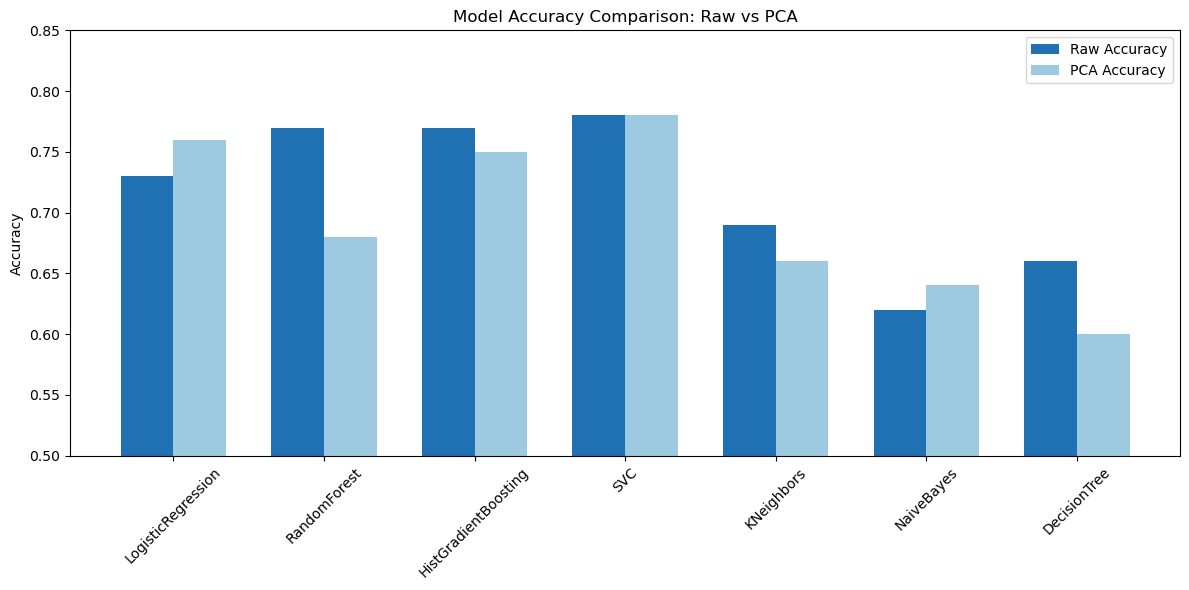

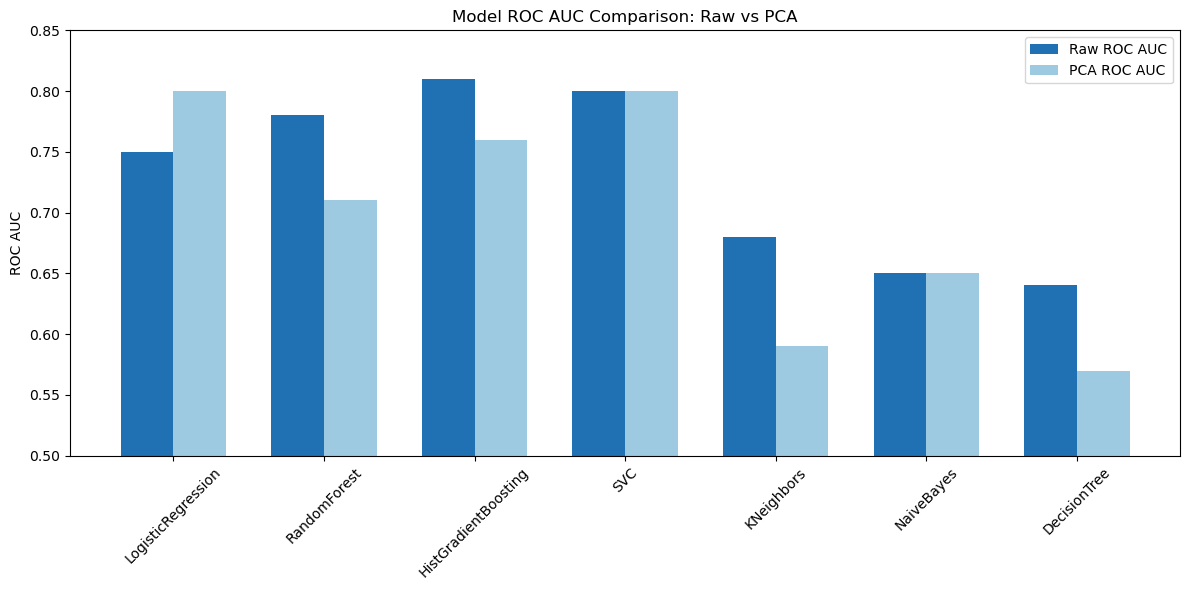

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

models = [
    "LogisticRegression", "RandomForest", "HistGradientBoosting", "SVC",
    "KNeighbors", "NaiveBayes", "DecisionTree"
]

raw_acc = np.array([0.73, 0.77, 0.77, 0.78, 0.69, 0.62, 0.66])
pca_acc = np.array([0.76, 0.68, 0.75, 0.78, 0.66, 0.64, 0.60])

raw_auc = np.array([0.75, 0.78, 0.81, 0.80, 0.68, 0.65, 0.64])
pca_auc = np.array([0.80, 0.71, 0.76, 0.80, 0.59, 0.65, 0.57])

blue_palette = sns.color_palette("Blues", n_colors=7)

x = np.arange(len(models))
width = 0.35

# Accuracy comparison
plt.figure(figsize=(12,6))
plt.bar(x - width/2, raw_acc, width, label='Raw Accuracy', color=blue_palette[5])
plt.bar(x + width/2, pca_acc, width, label='PCA Accuracy', color=blue_palette[2])
plt.xticks(x, models, rotation=45)
plt.ylabel('Accuracy')
plt.ylim(0.5, 0.85)
plt.title('Model Accuracy Comparison: Raw vs PCA')
plt.legend()
plt.tight_layout()
plt.savefig('classification_accuracy_comparison.png')
plt.show()

# ROC AUC comparison
plt.figure(figsize=(12,6))
plt.bar(x - width/2, raw_auc, width, label='Raw ROC AUC', color=blue_palette[5])
plt.bar(x + width/2, pca_auc, width, label='PCA ROC AUC', color=blue_palette[2])
plt.xticks(x, models, rotation=45)
plt.ylabel('ROC AUC')
plt.ylim(0.5, 0.85)
plt.title('Model ROC AUC Comparison: Raw vs PCA')
plt.legend()
plt.tight_layout()
plt.savefig('classification_auc_comparison.png')
plt.show()


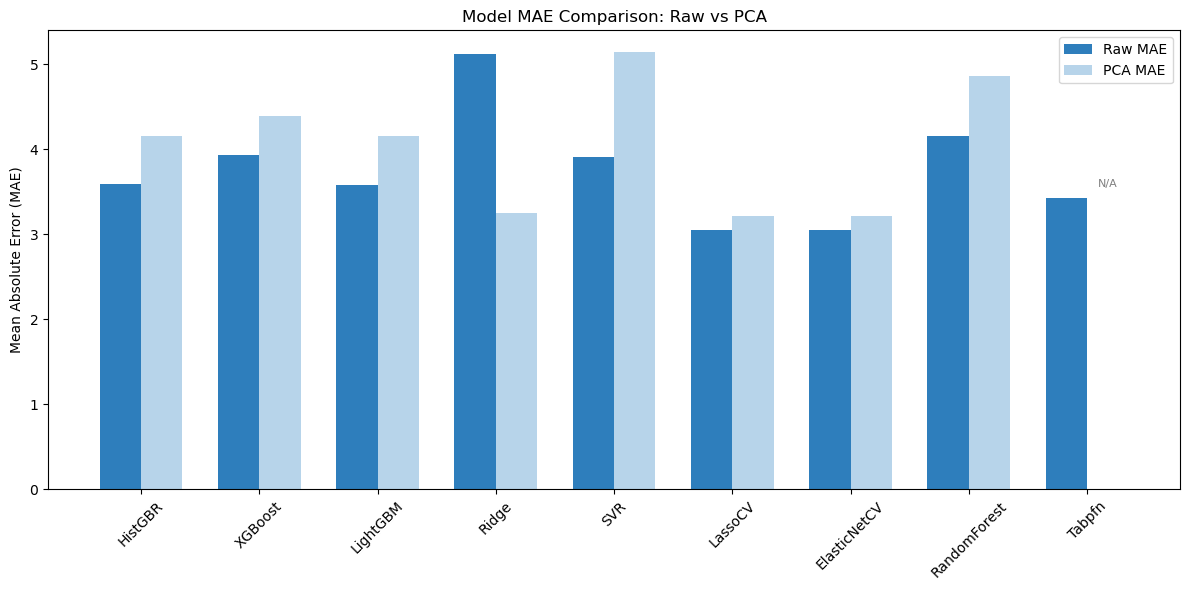

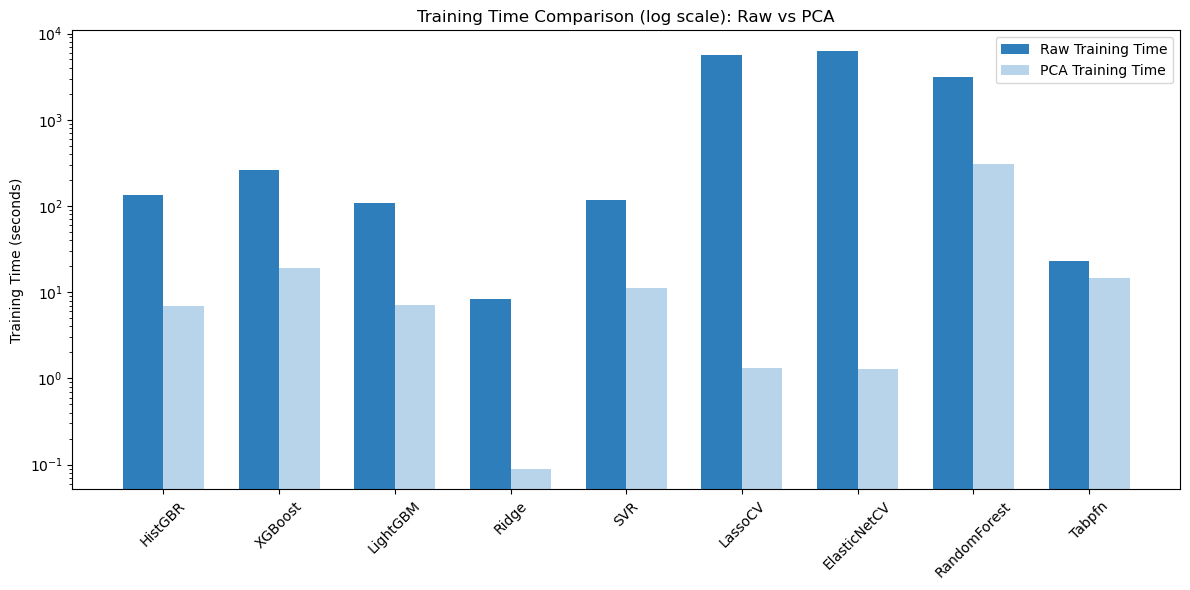

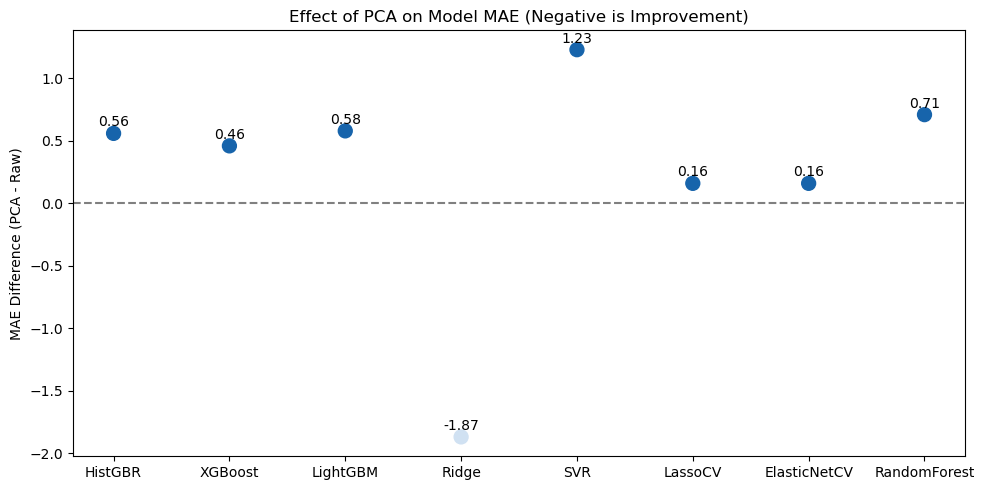

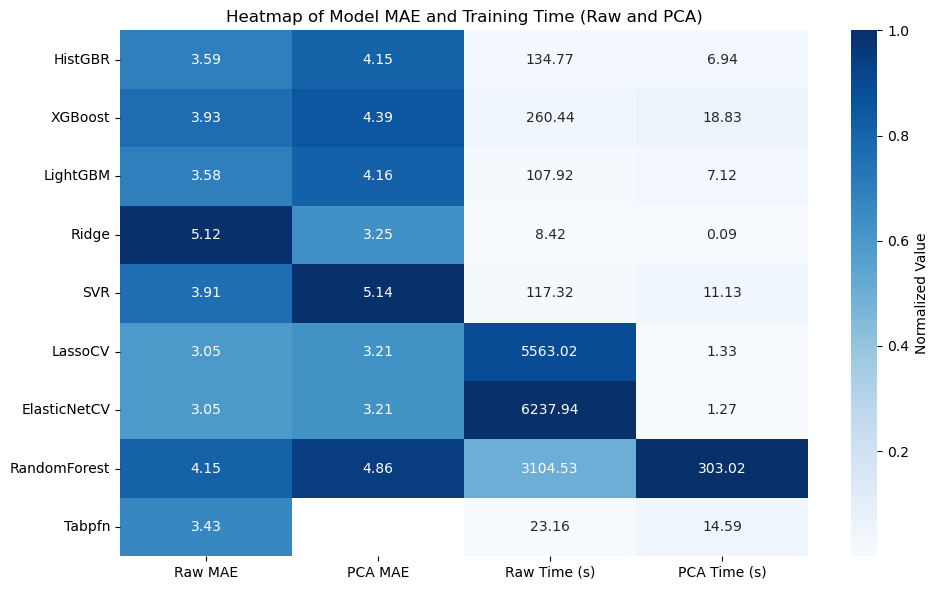

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# Updated model list
models = [
    "HistGBR", "XGBoost", "LightGBM", "Ridge",
    "SVR", "LassoCV", "ElasticNetCV", "RandomForest", "Tabpfn"
]

# MAE values (Raw and PCA)
raw_mae = np.array([3.59, 3.93, 3.58, 5.12, 3.91, 3.05, 3.05, 4.15, 3.43])
pca_mae = np.array([4.15, 4.39, 4.16, 3.25, 5.14, 3.21, 3.21, 4.86, np.nan])  # No PCA for Regression

# Training times
raw_time = np.array([134.77, 260.44, 107.92, 8.42, 117.32, 5563.02, 6237.94, 3104.53, 23.16])
pca_time = np.array([6.94, 18.83, 7.12, 0.09, 11.13, 1.33, 1.27, 303.02, (13.25 + 15.93) / 2])  # Avg test time as proxy

# MAE difference (PCA - Raw)
mae_diff = pca_mae - raw_mae

# Color palette
blue_palette = sns.color_palette("Blues", n_colors=9)

# 1. MAE Comparison Bar Chart
plt.figure(figsize=(12, 6))
x = np.arange(len(models))
width = 0.35

plt.bar(x - width/2, raw_mae, width, label='Raw MAE', color=blue_palette[6])
plt.bar(x + width/2, np.nan_to_num(pca_mae, nan=0), width, label='PCA MAE', color=blue_palette[2])
for i, val in enumerate(pca_mae):
    if np.isnan(val):
        plt.text(x[i] + width/2, raw_mae[i] + 0.1, 'N/A', ha='center', va='bottom', fontsize=8, color='gray')
plt.xticks(x, models, rotation=45)
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Model MAE Comparison: Raw vs PCA')
plt.legend()
plt.tight_layout()
plt.savefig('mae_comparison.png')
plt.show()

# 2. Training Time Comparison Bar Chart (log scale)
plt.figure(figsize=(12, 6))
plt.bar(x - width/2, raw_time, width, label='Raw Training Time', color=blue_palette[6])
plt.bar(x + width/2, pca_time, width, label='PCA Training Time', color=blue_palette[2])
plt.xticks(x, models, rotation=45)
plt.ylabel('Training Time (seconds)')
plt.yscale('log')
plt.title('Training Time Comparison (log scale): Raw vs PCA')
plt.legend()
plt.tight_layout()
plt.savefig('training_time_comparison.png')
plt.show()

# 3. MAE Change Scatter Plot (PCA - Raw)
plt.figure(figsize=(10, 5))
valid_indices = ~np.isnan(mae_diff)
models_filtered = np.array(models)[valid_indices]
mae_diff_filtered = mae_diff[valid_indices]
colors = [blue_palette[1] if diff <= 0 else blue_palette[7] for diff in mae_diff_filtered]
plt.axhline(0, color='gray', linestyle='--')
plt.scatter(models_filtered, mae_diff_filtered, color=colors, s=100)
plt.ylabel('MAE Difference (PCA - Raw)')
plt.title('Effect of PCA on Model MAE (Negative is Improvement)')
for i, txt in enumerate(mae_diff_filtered):
    plt.annotate(f"{txt:.2f}", (models_filtered[i], mae_diff_filtered[i]), textcoords="offset points", xytext=(0, 5), ha='center')
plt.tight_layout()
plt.savefig('mae_diff_scatter.png')
plt.show()

# 4. Heatmap of MAE and Training Time (Raw vs PCA)
heatmap_data = pd.DataFrame({
    'Raw MAE': raw_mae,
    'PCA MAE': pca_mae,
    'Raw Time (s)': raw_time,
    'PCA Time (s)': pca_time
}, index=models)

# Normalize for better heatmap color scaling
heatmap_norm = heatmap_data.copy()
heatmap_norm[['Raw MAE', 'PCA MAE']] = heatmap_norm[['Raw MAE', 'PCA MAE']] / np.nanmax(heatmap_norm[['Raw MAE', 'PCA MAE']].values)
heatmap_norm[['Raw Time (s)', 'PCA Time (s)']] = heatmap_norm[['Raw Time (s)', 'PCA Time (s)']] / heatmap_norm[['Raw Time (s)', 'PCA Time (s)']].max()

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_norm, annot=heatmap_data.round(2), fmt='', cmap='Blues', cbar_kws={'label': 'Normalized Value'}, mask=heatmap_data.isnull())
plt.title('Heatmap of Model MAE and Training Time (Raw and PCA)')
plt.tight_layout()
plt.savefig('performance_heatmap.png')
plt.show()


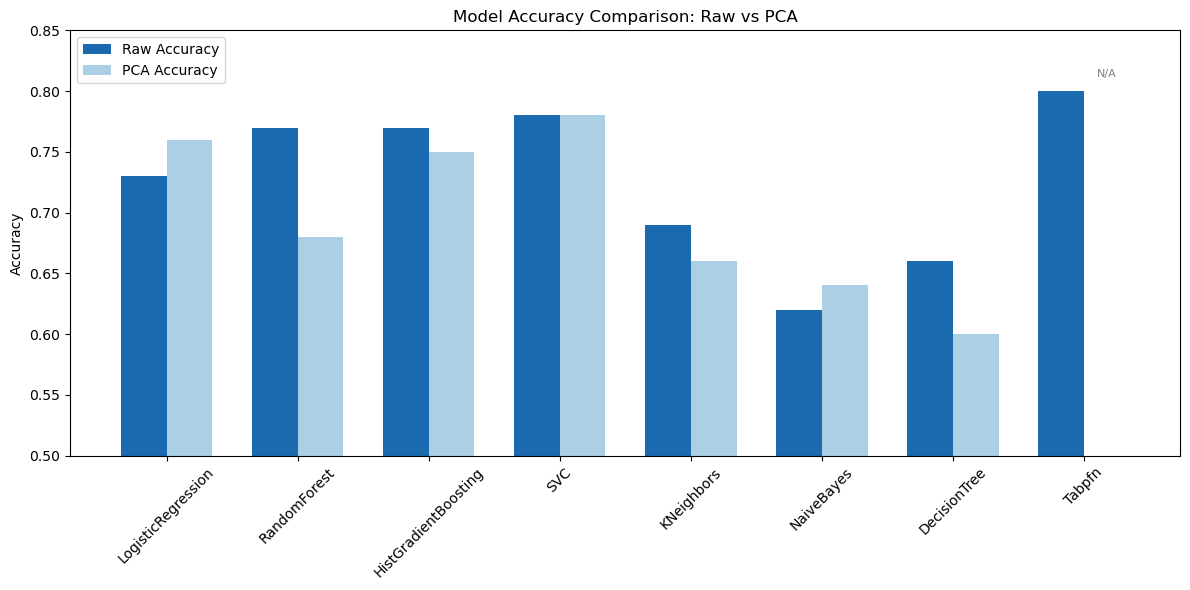

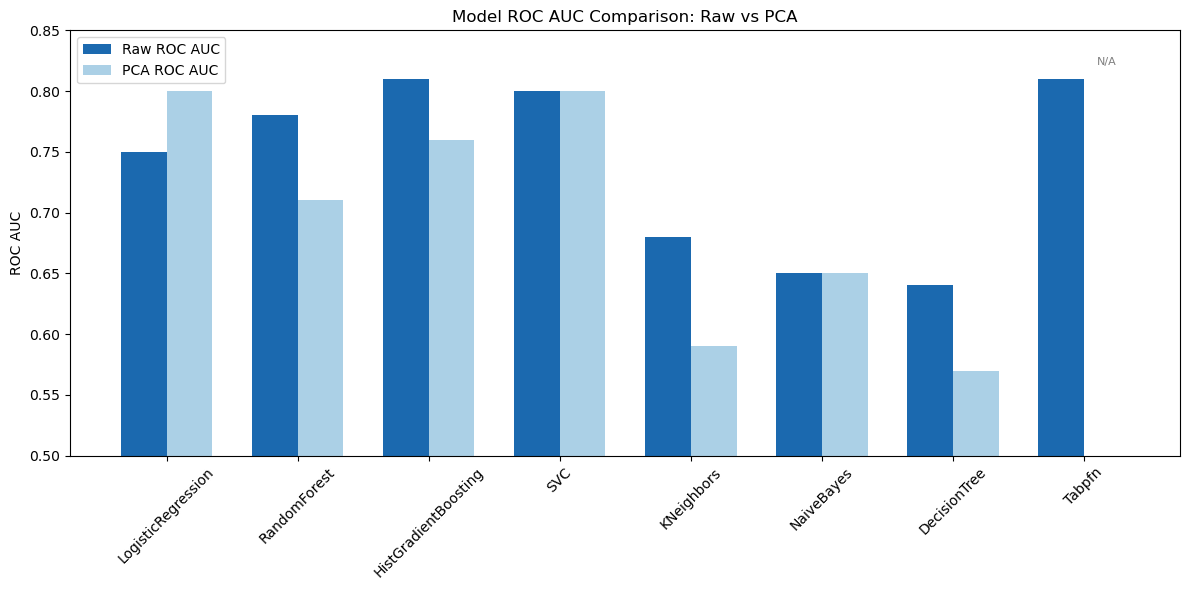

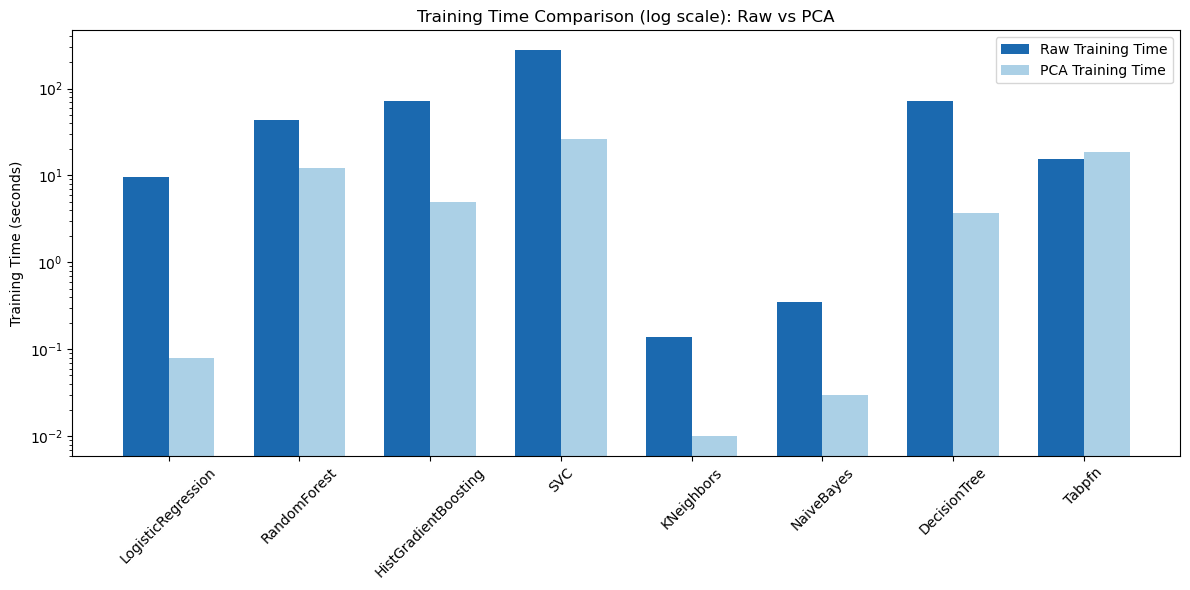

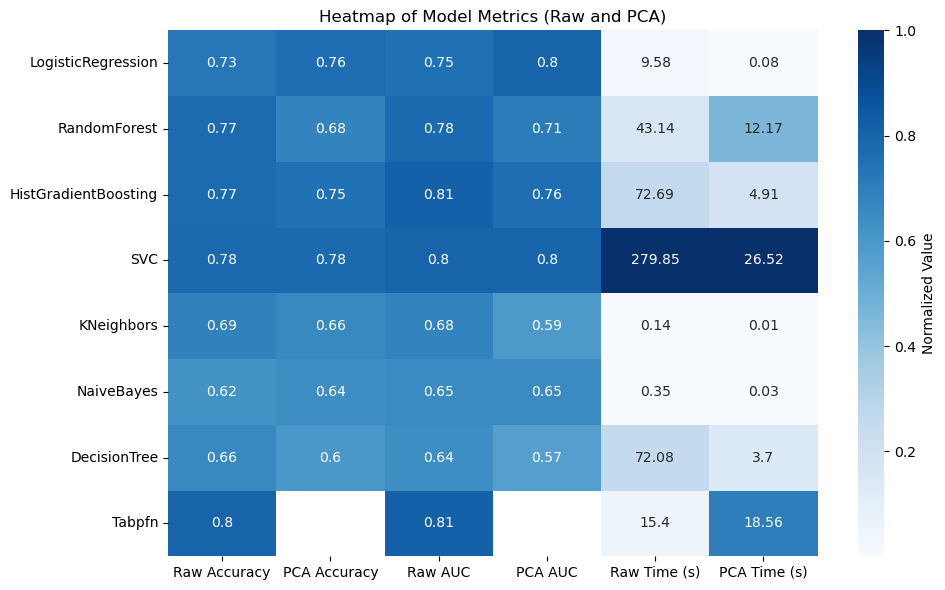

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

models = [
    "LogisticRegression", "RandomForest", "HistGradientBoosting", "SVC",
    "KNeighbors", "NaiveBayes", "DecisionTree", "Tabpfn"
]

# Accuracy (Raw and PCA)
raw_acc = np.array([0.73, 0.77, 0.77, 0.78, 0.69, 0.62, 0.66, 0.80])
pca_acc = np.array([0.76, 0.68, 0.75, 0.78, 0.66, 0.64, 0.60, np.nan])

# ROC AUC (Raw and PCA)
raw_auc = np.array([0.75, 0.78, 0.81, 0.80, 0.68, 0.65, 0.64, 0.81])
pca_auc = np.array([0.80, 0.71, 0.76, 0.80, 0.59, 0.65, 0.57, np.nan])

# Training times (Raw and PCA)
raw_time = np.array([9.58, 43.14, 72.69, 279.85, 0.14, 0.35, 72.08, 15.40])
pca_time = np.array([0.08, 12.17, 4.91, 26.52, 0.01, 0.03, 3.70, 18.56])

blue_palette = sns.color_palette("Blues", n_colors=8)
x = np.arange(len(models))
width = 0.35

# 1. Accuracy Comparison
plt.figure(figsize=(12,6))
plt.bar(x - width/2, raw_acc, width, label='Raw Accuracy', color=blue_palette[6])
plt.bar(x + width/2, np.nan_to_num(pca_acc, nan=0), width, label='PCA Accuracy', color=blue_palette[2])
for i, val in enumerate(pca_acc):
    if np.isnan(val):
        plt.text(x[i] + width/2, raw_acc[i] + 0.01, 'N/A', ha='center', va='bottom', fontsize=8, color='gray')
plt.xticks(x, models, rotation=45)
plt.ylabel('Accuracy')
plt.ylim(0.5, 0.85)
plt.title('Model Accuracy Comparison: Raw vs PCA')
plt.legend()
plt.tight_layout()
plt.savefig('classification_accuracy_comparison.png')
plt.show()

# 2. ROC AUC Comparison
plt.figure(figsize=(12,6))
plt.bar(x - width/2, raw_auc, width, label='Raw ROC AUC', color=blue_palette[6])
plt.bar(x + width/2, np.nan_to_num(pca_auc, nan=0), width, label='PCA ROC AUC', color=blue_palette[2])
for i, val in enumerate(pca_auc):
    if np.isnan(val):
        plt.text(x[i] + width/2, raw_auc[i] + 0.01, 'N/A', ha='center', va='bottom', fontsize=8, color='gray')
plt.xticks(x, models, rotation=45)
plt.ylabel('ROC AUC')
plt.ylim(0.5, 0.85)
plt.title('Model ROC AUC Comparison: Raw vs PCA')
plt.legend()
plt.tight_layout()
plt.savefig('classification_auc_comparison.png')
plt.show()

# 3. Training Time Comparison (log scale)
plt.figure(figsize=(12,6))
plt.bar(x - width/2, raw_time, width, label='Raw Training Time', color=blue_palette[6])
plt.bar(x + width/2, pca_time, width, label='PCA Training Time', color=blue_palette[2])
plt.xticks(x, models, rotation=45)
plt.ylabel('Training Time (seconds)')
plt.yscale('log')
plt.title('Training Time Comparison (log scale): Raw vs PCA')
plt.legend()
plt.tight_layout()
plt.savefig('classification_training_time_comparison.png')
plt.show()

# 4. Heatmap of All Metrics
df = pd.DataFrame({
    'Raw Accuracy': raw_acc,
    'PCA Accuracy': pca_acc,
    'Raw AUC': raw_auc,
    'PCA AUC': pca_auc,
    'Raw Time (s)': raw_time,
    'PCA Time (s)': pca_time
}, index=models)

# Normalize for heatmap scaling
df_norm = df.copy()
df_norm[['Raw Accuracy', 'PCA Accuracy', 'Raw AUC', 'PCA AUC']] /= 1.0  # already in 0–1 range
df_norm[['Raw Time (s)', 'PCA Time (s)']] = df_norm[['Raw Time (s)', 'PCA Time (s)']] / df_norm[['Raw Time (s)', 'PCA Time (s)']].max()

plt.figure(figsize=(10,6))
sns.heatmap(df_norm, annot=df.round(2), fmt='', cmap='Blues', cbar_kws={'label': 'Normalized Value'})
plt.title('Heatmap of Model Metrics (Raw and PCA)')
plt.tight_layout()
plt.savefig('classification_metrics_heatmap.png')
plt.show()


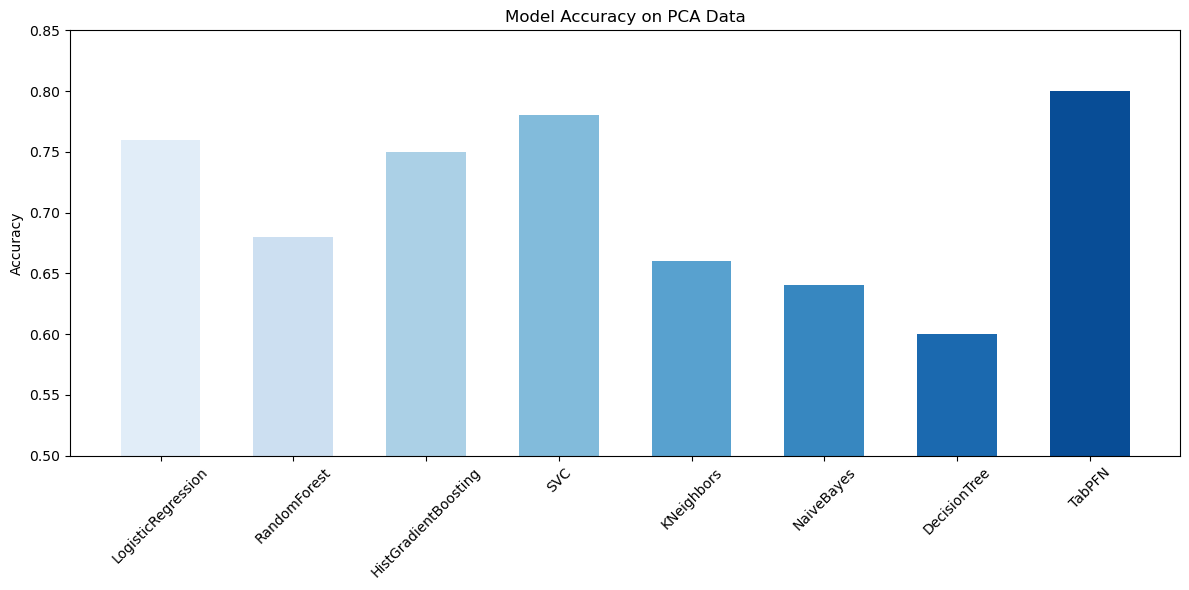

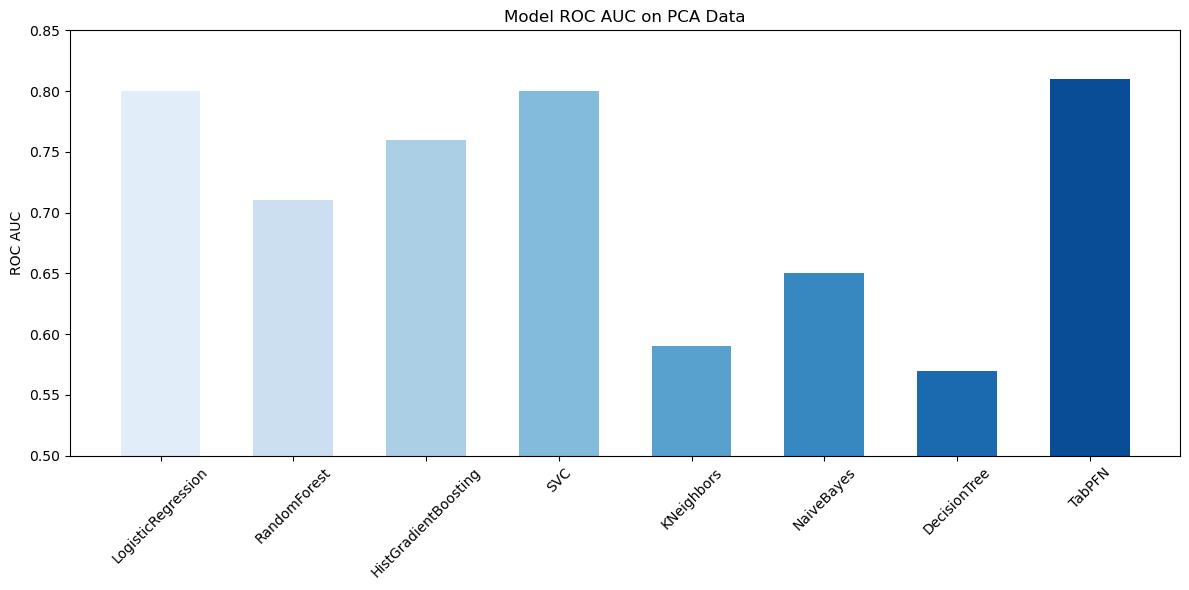

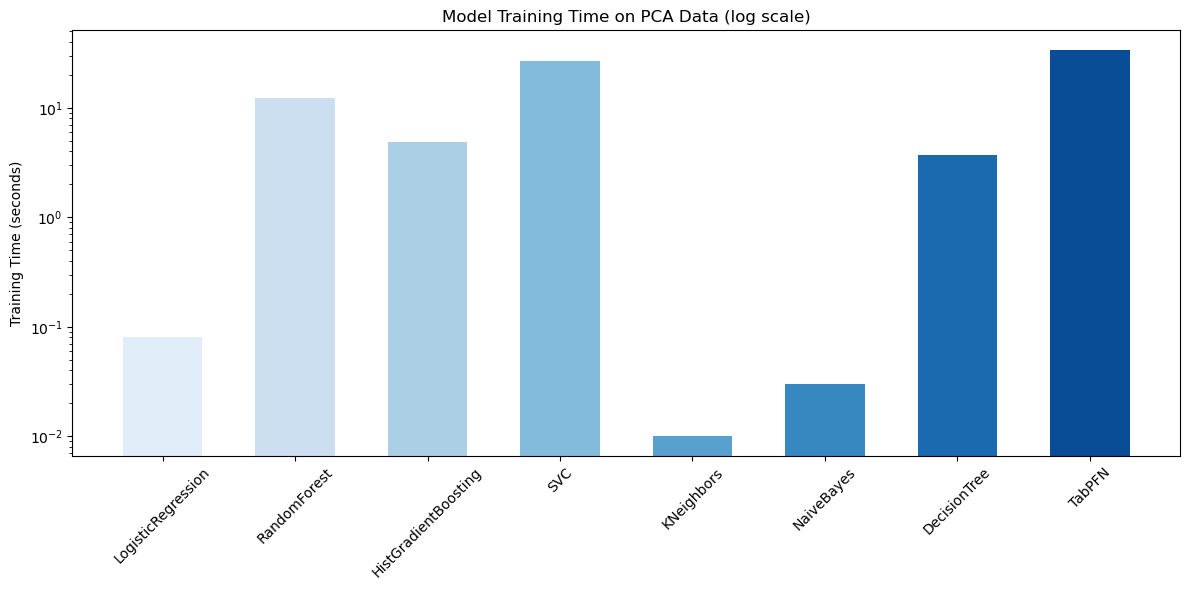

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# PCA-only models and metrics (including TabPFN)
models = [
    "LogisticRegression", "RandomForest", "HistGradientBoosting", "SVC",
    "KNeighbors", "NaiveBayes", "DecisionTree", "TabPFN"
]

pca_acc = np.array([0.76, 0.68, 0.75, 0.78, 0.66, 0.64, 0.60, 0.80])
pca_auc = np.array([0.80, 0.71, 0.76, 0.80, 0.59, 0.65, 0.57, 0.81])
pca_time = np.array([0.08, 12.17, 4.91, 26.52, 0.01, 0.03, 3.70, 33.96])  # TabPFN total = training + testing

blue_palette = sns.color_palette("Blues", n_colors=len(models))

x = np.arange(len(models))
width = 0.6

# 1. PCA Accuracy Plot
plt.figure(figsize=(12,6))
plt.bar(x, pca_acc, width=width, color=blue_palette)
plt.xticks(x, models, rotation=45)
plt.ylabel('Accuracy')
plt.ylim(0.5, 0.85)
plt.title('Model Accuracy on PCA Data')
plt.tight_layout()
plt.savefig('pca_only_accuracy.png')
plt.show()

# 2. PCA ROC AUC Plot
plt.figure(figsize=(12,6))
plt.bar(x, pca_auc, width=width, color=blue_palette)
plt.xticks(x, models, rotation=45)
plt.ylabel('ROC AUC')
plt.ylim(0.5, 0.85)
plt.title('Model ROC AUC on PCA Data')
plt.tight_layout()
plt.savefig('pca_only_auc.png')
plt.show()

# 3. PCA Training Time (log scale)
plt.figure(figsize=(12,6))
plt.bar(x, pca_time, width=width, color=blue_palette)
plt.xticks(x, models, rotation=45)
plt.ylabel('Training Time (seconds)')
plt.yscale('log')
plt.title('Model Training Time on PCA Data (log scale)')
plt.tight_layout()
plt.savefig('pca_only_training_time.png')
plt.show()


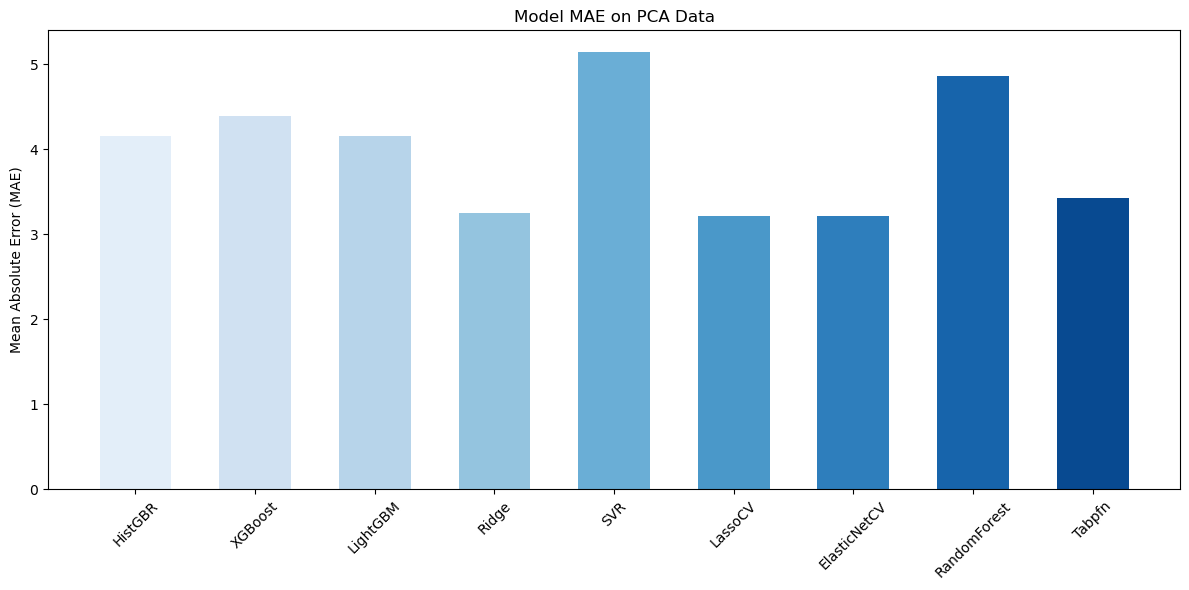

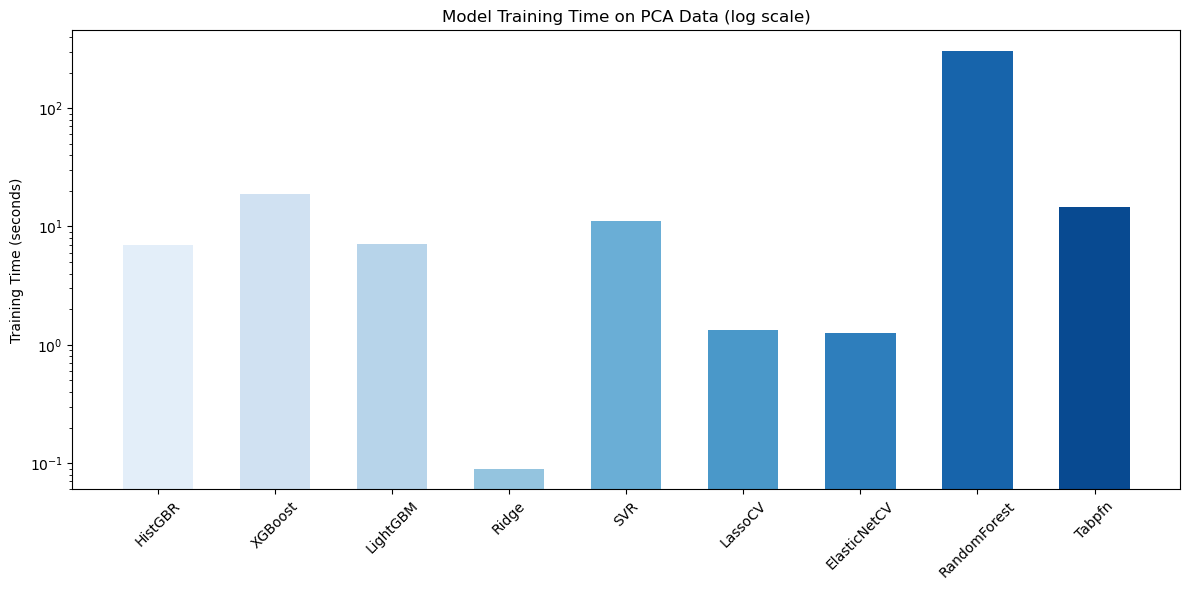

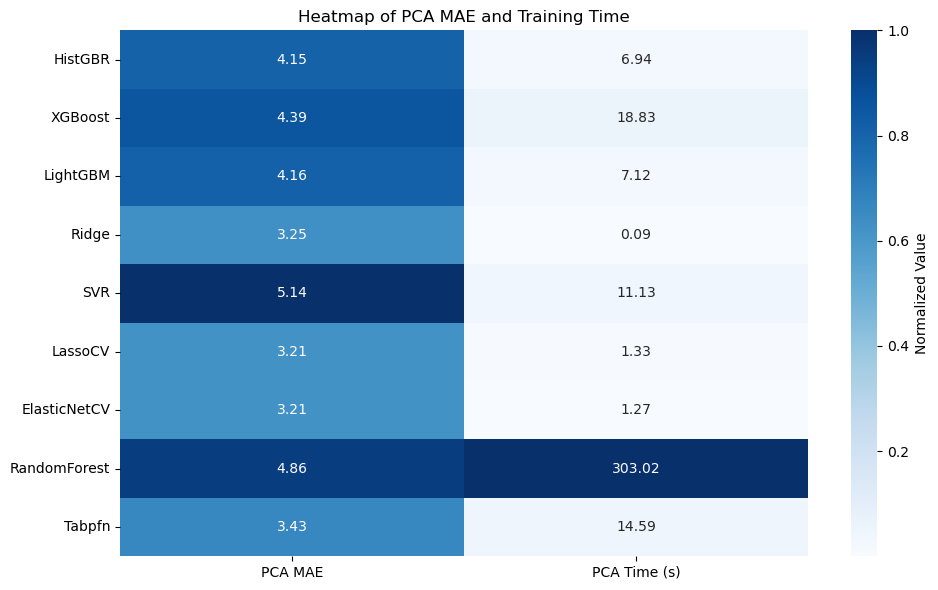

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# PCA-only models
models = [
    "HistGBR", "XGBoost", "LightGBM", "Ridge",
    "SVR", "LassoCV", "ElasticNetCV", "RandomForest", "Tabpfn"
]

# PCA MAE (Tabpfn included, others from PCA results)
pca_mae = np.array([4.15, 4.39, 4.16, 3.25, 5.14, 3.21, 3.21, 4.86, 3.43])

# PCA training time (Tabpfn avg of train/test; others from PCA runs)
pca_time = np.array([6.94, 18.83, 7.12, 0.09, 11.13, 1.33, 1.27, 303.02, (13.25 + 15.93) / 2])

blue_palette = sns.color_palette("Blues", n_colors=len(models))
x = np.arange(len(models))
width = 0.6

# 1. PCA MAE Bar Plot
plt.figure(figsize=(12, 6))
plt.bar(x, pca_mae, width=width, color=blue_palette)
plt.xticks(x, models, rotation=45)
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Model MAE on PCA Data')
plt.tight_layout()
plt.savefig('pca_only_mae.png')
plt.show()

# 2. PCA Training Time (Log Scale)
plt.figure(figsize=(12, 6))
plt.bar(x, pca_time, width=width, color=blue_palette)
plt.xticks(x, models, rotation=45)
plt.ylabel('Training Time (seconds)')
plt.yscale('log')
plt.title('Model Training Time on PCA Data (log scale)')
plt.tight_layout()
plt.savefig('pca_only_training_time.png')
plt.show()

# 3. Heatmap: PCA MAE & Training Time
heatmap_data = pd.DataFrame({
    'PCA MAE': pca_mae,
    'PCA Time (s)': pca_time
}, index=models)

heatmap_norm = heatmap_data.copy()
heatmap_norm['PCA MAE'] = heatmap_norm['PCA MAE'] / heatmap_norm['PCA MAE'].max()
heatmap_norm['PCA Time (s)'] = heatmap_norm['PCA Time (s)'] / heatmap_norm['PCA Time (s)'].max()

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_norm, annot=heatmap_data.round(2), fmt='', cmap='Blues', cbar_kws={'label': 'Normalized Value'})
plt.title('Heatmap of PCA MAE and Training Time')
plt.tight_layout()
plt.savefig('pca_only_heatmap.png')
plt.show()
